In [8]:
import healpy as hp
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd
import plotly.express as px

In [9]:
files = os.listdir('./PowerSpectrumDV/')
PowerSpectrumFolder = './PowerSpectrumDV/'
titles = [word[:-4] for word in files]

In [10]:
nside = 1024
PowerSpectrum = np.zeros((1,3*nside))
for i in files:
    PowerSpectrum = np.vstack((PowerSpectrum,np.load(PowerSpectrumFolder+i)[0:3*nside]))
PowerSpectrum = PowerSpectrum[1:]

In [11]:
PowerSpectrum.shape

(58, 3072)

In [12]:
titles

['kSZ_NS_1024_R_2968_P_2048_DV_320',
 'kSZ_NS_1024_R_2968_P_2048_DV_400',
 'lensedkSZ_NS_1024_R_2968_P_2048_DV_320',
 'lensedkSZ_NS_1024_R_2968_P_2048_DV_400',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_320',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_320_SuperBin_0',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_320_SuperBin_1',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_320_SuperBin_2',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_320_SuperBin_3',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_320_SuperBin_4',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_320_SuperBin_5',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_320_SuperBin_6',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_320_SuperBin_7',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_400',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_400_SuperBin_0',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_400_SuperBin_1',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_400_SuperBin_2',
 'lensedOverdensity_NS_1024_R_2968_P_2048_DV_400_SuperBi

In [13]:
df = pd.DataFrame(np.transpose(PowerSpectrum),columns=titles)

In [17]:
px.line(df.filter(regex='verdensity').filter(regex='SuperBin_7'),log_x=True,log_y=True)

In [15]:
px.line(df.filter(regex='kSZ'),log_x=True,log_y=True)

In [32]:
# fig = px.line(dataDF,log_x=True)
# fig.write_html("./Correlations.html")

## Lens and Not Lensed Ratios

In [30]:
ratioLensToNotLensed = data[:36]

for i in range(36):
    ratioLensToNotLensed[i] = data[i]/data[i+36]

In [31]:
for i in range(9):
    plt.figure(dpi=400)
    plt.loglog(np.transpose(ratioLensToNotLensed[i:36:9,:1000]));
    plt.legend(titles[i:36:9]);
    plt.title('Ratio of Lensed to Not Lensed')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 2400x1600 with 0 Axes>

## Smooth Plots

In [50]:
smoothRatio = signal.savgol_filter(ratioLensToNotLensed, 49, 3, axis=1)

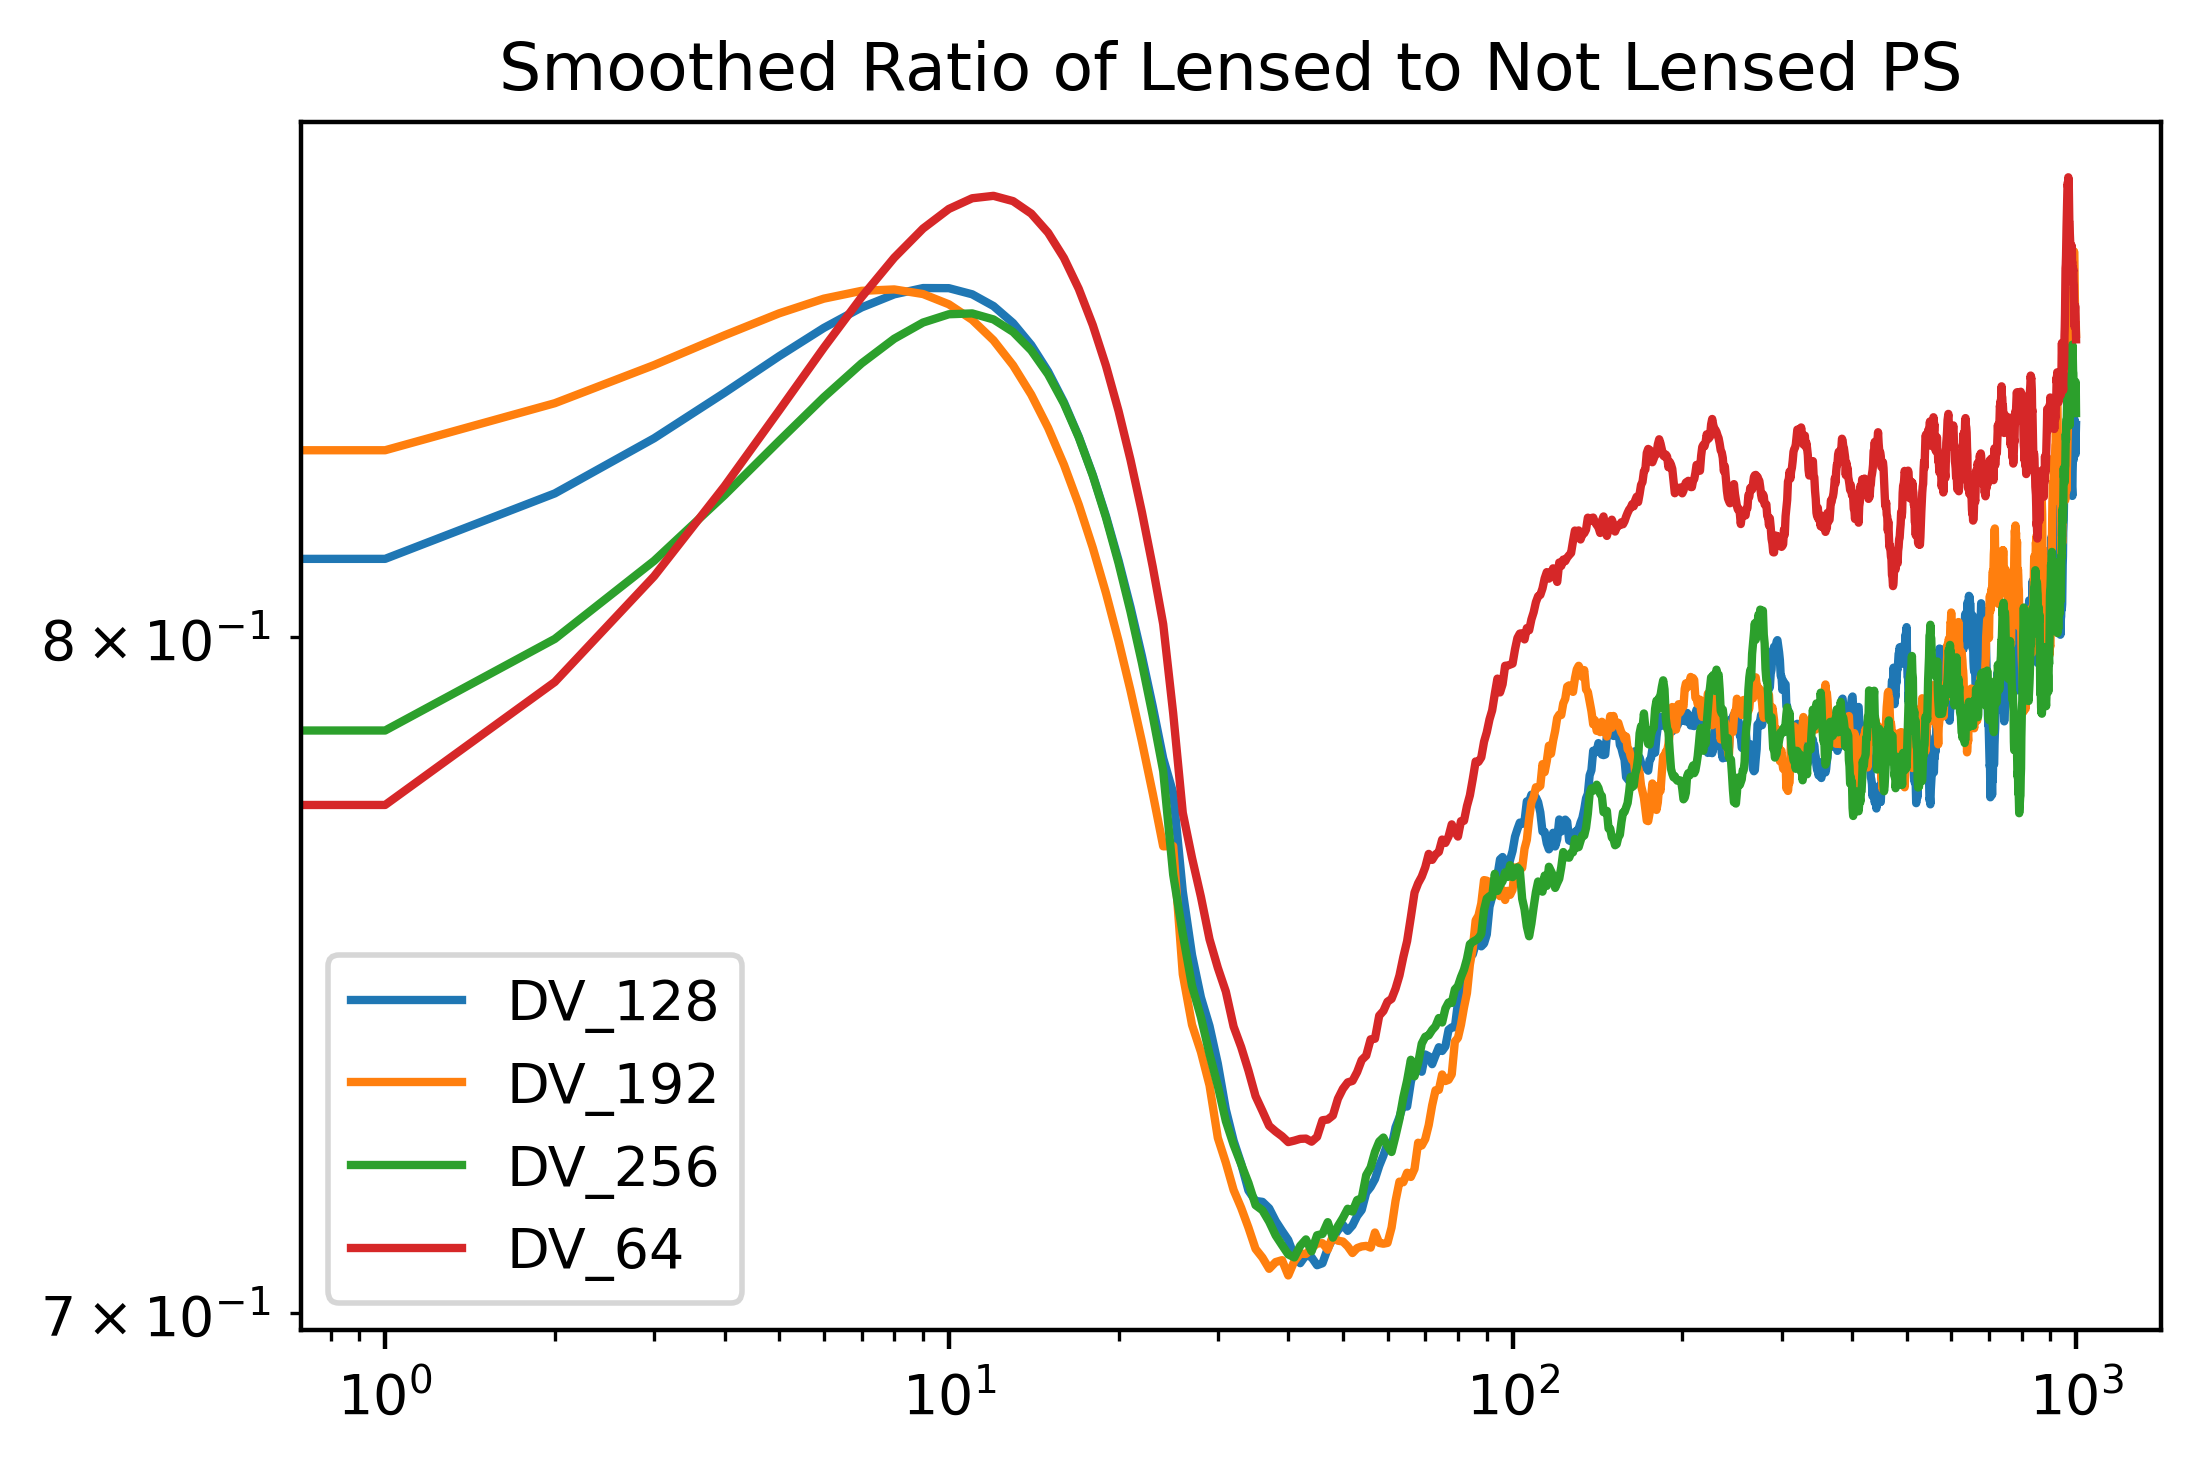

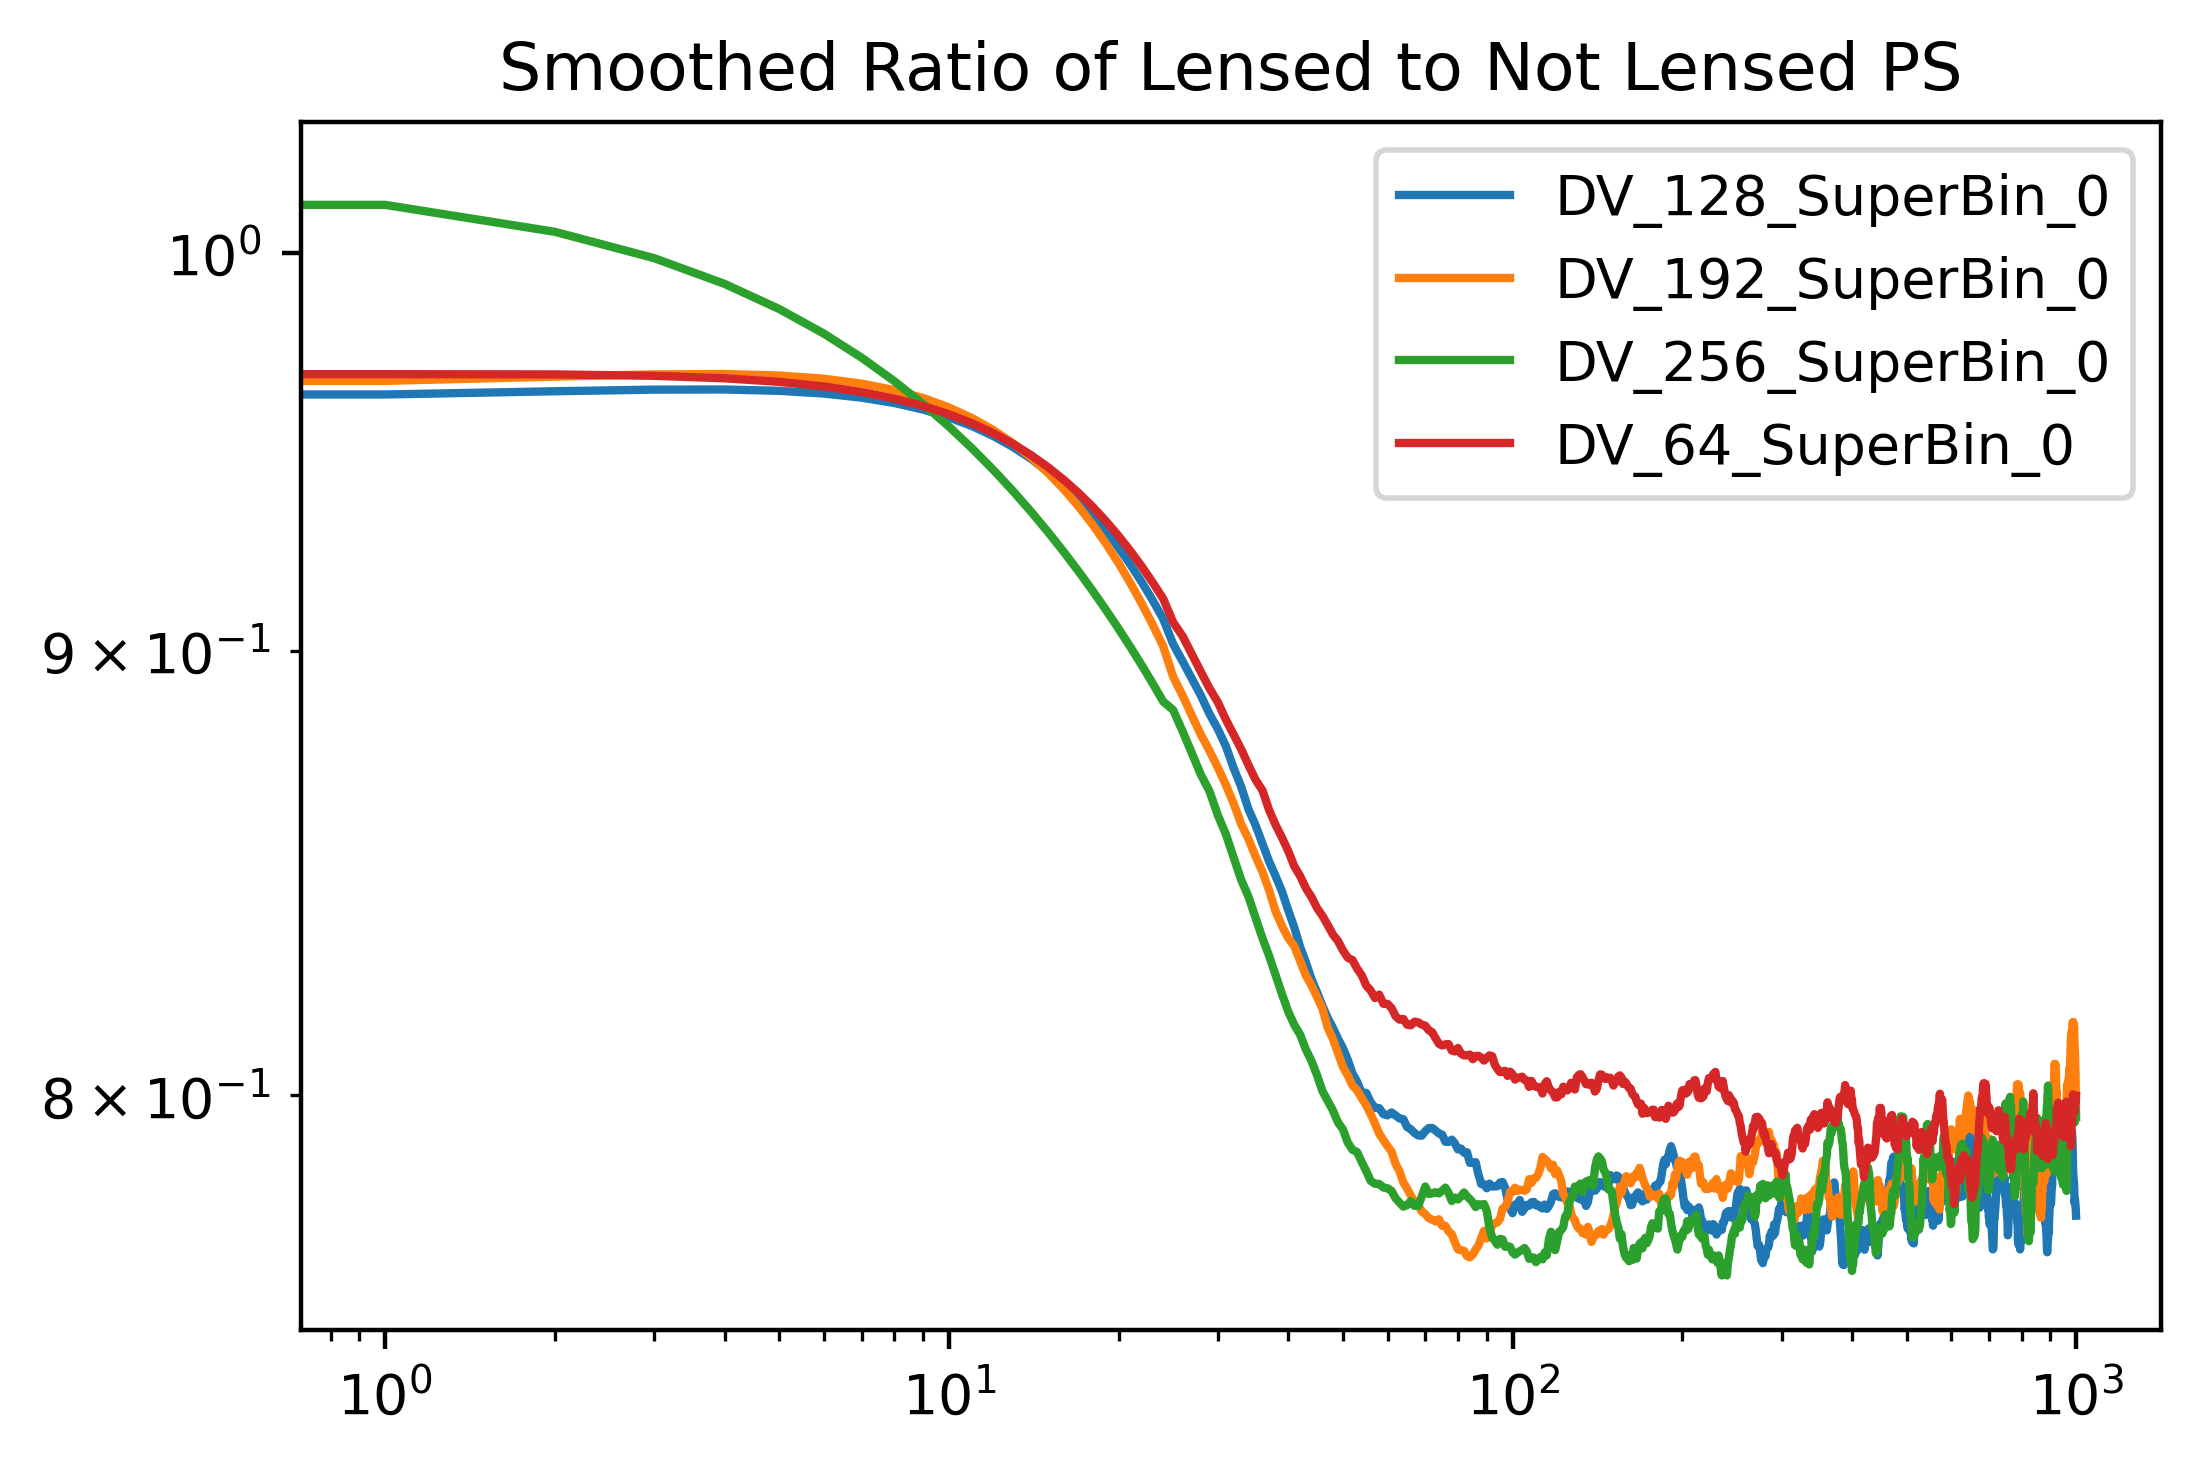

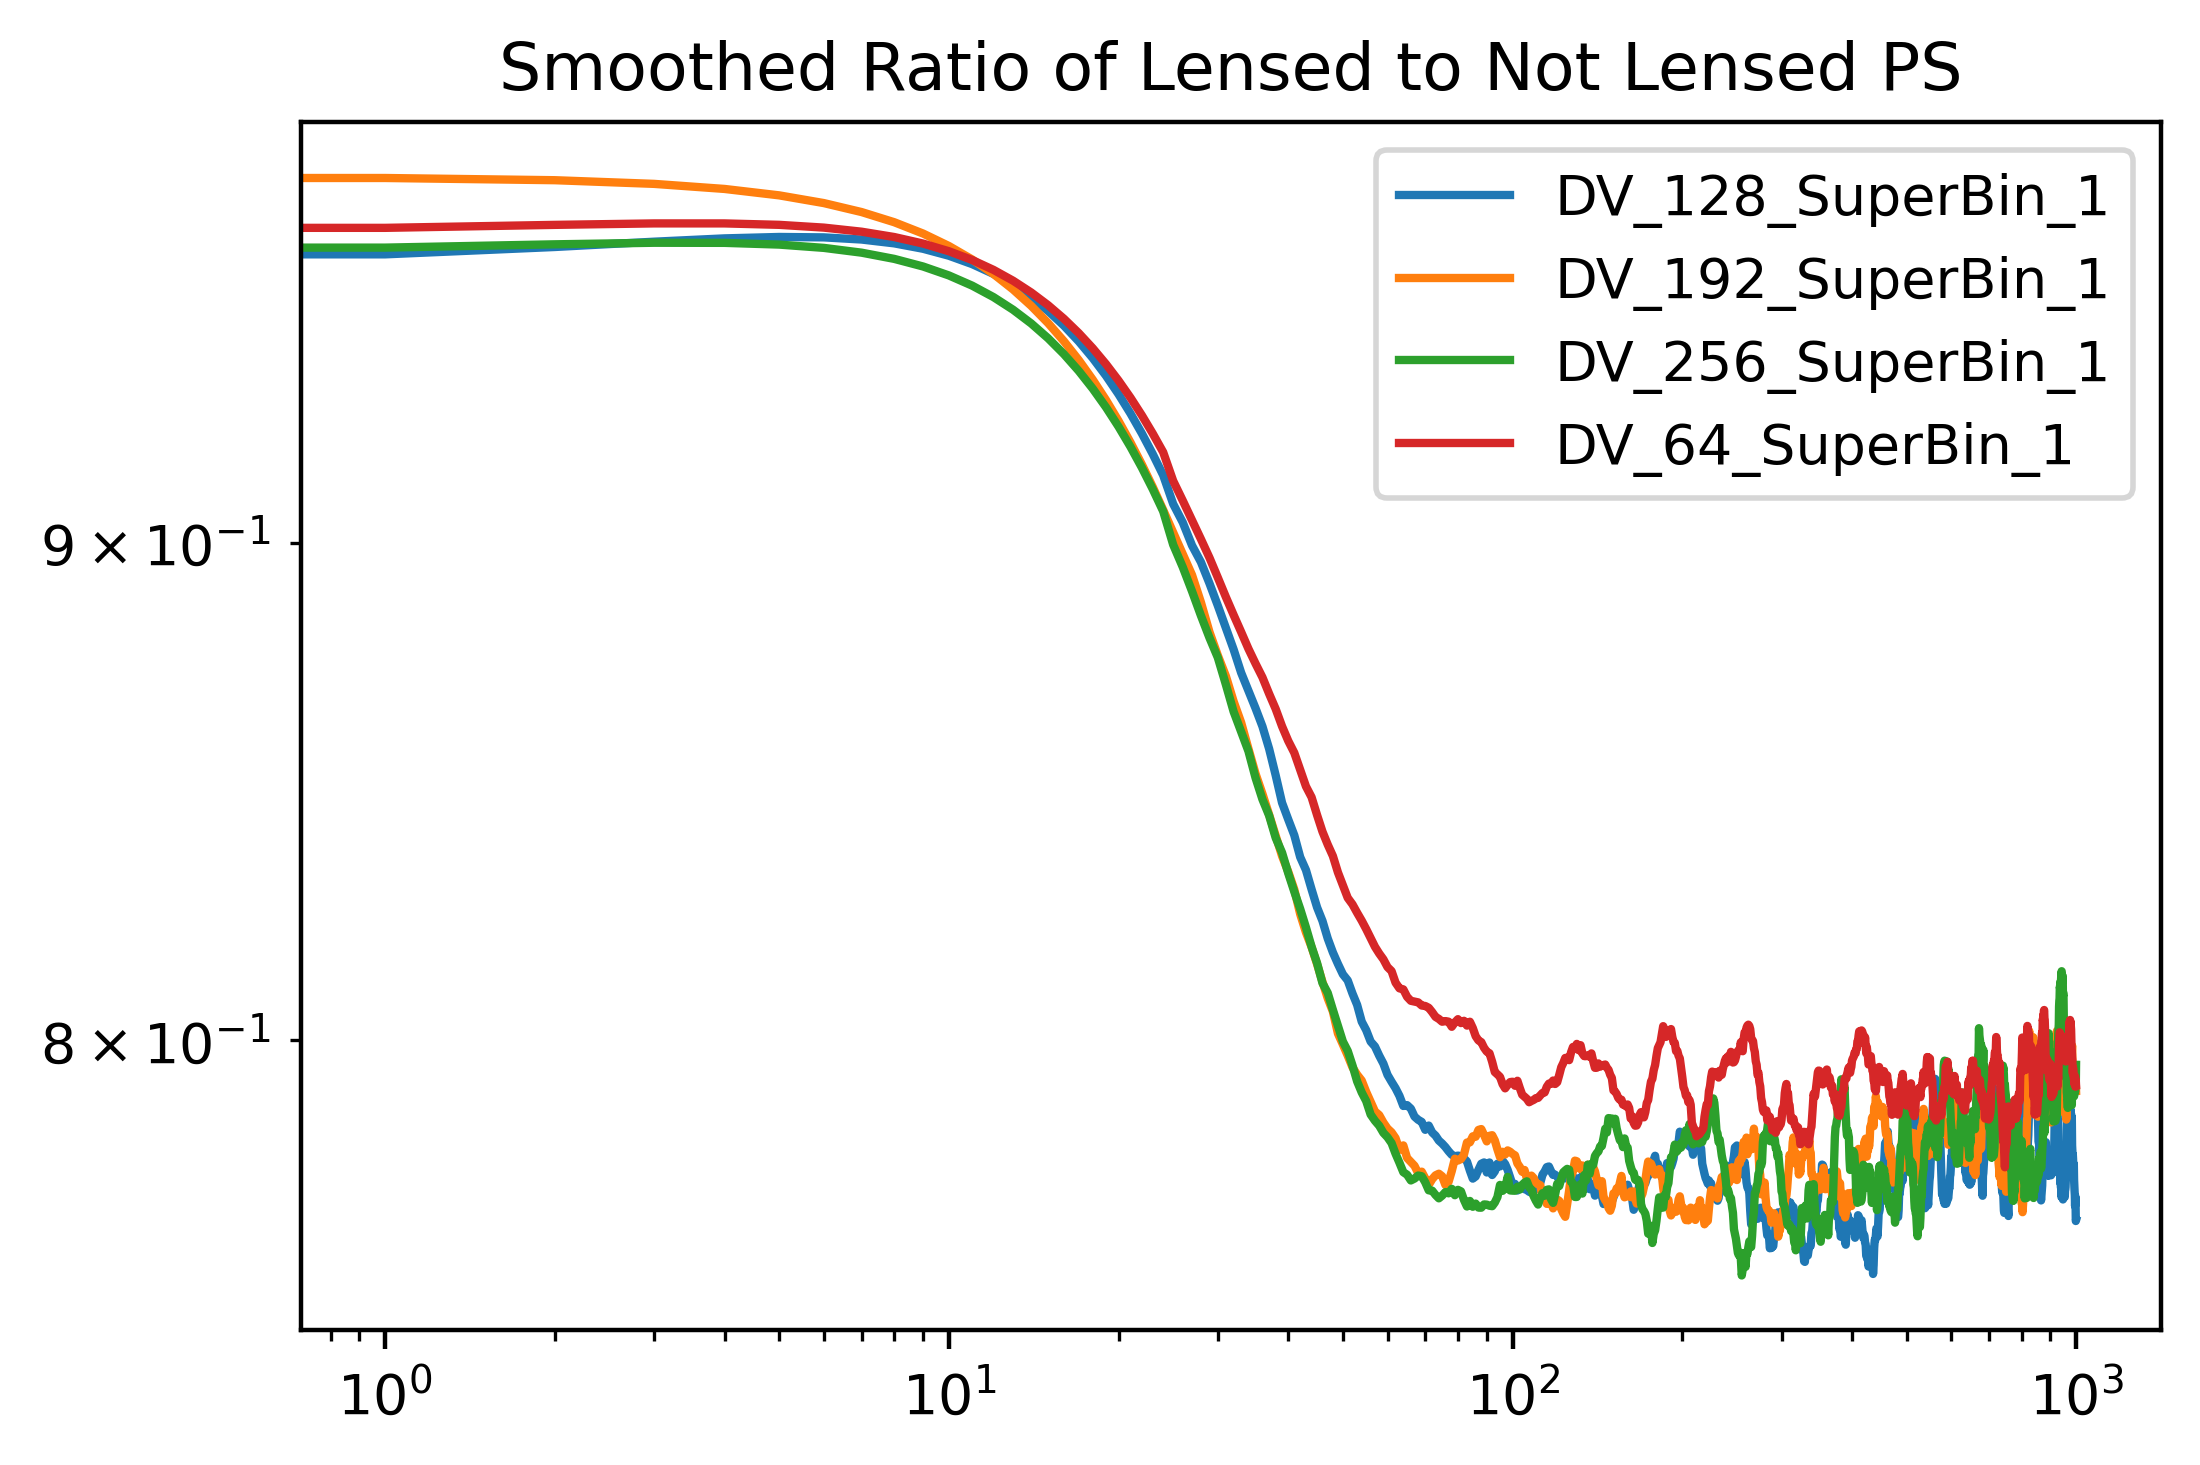

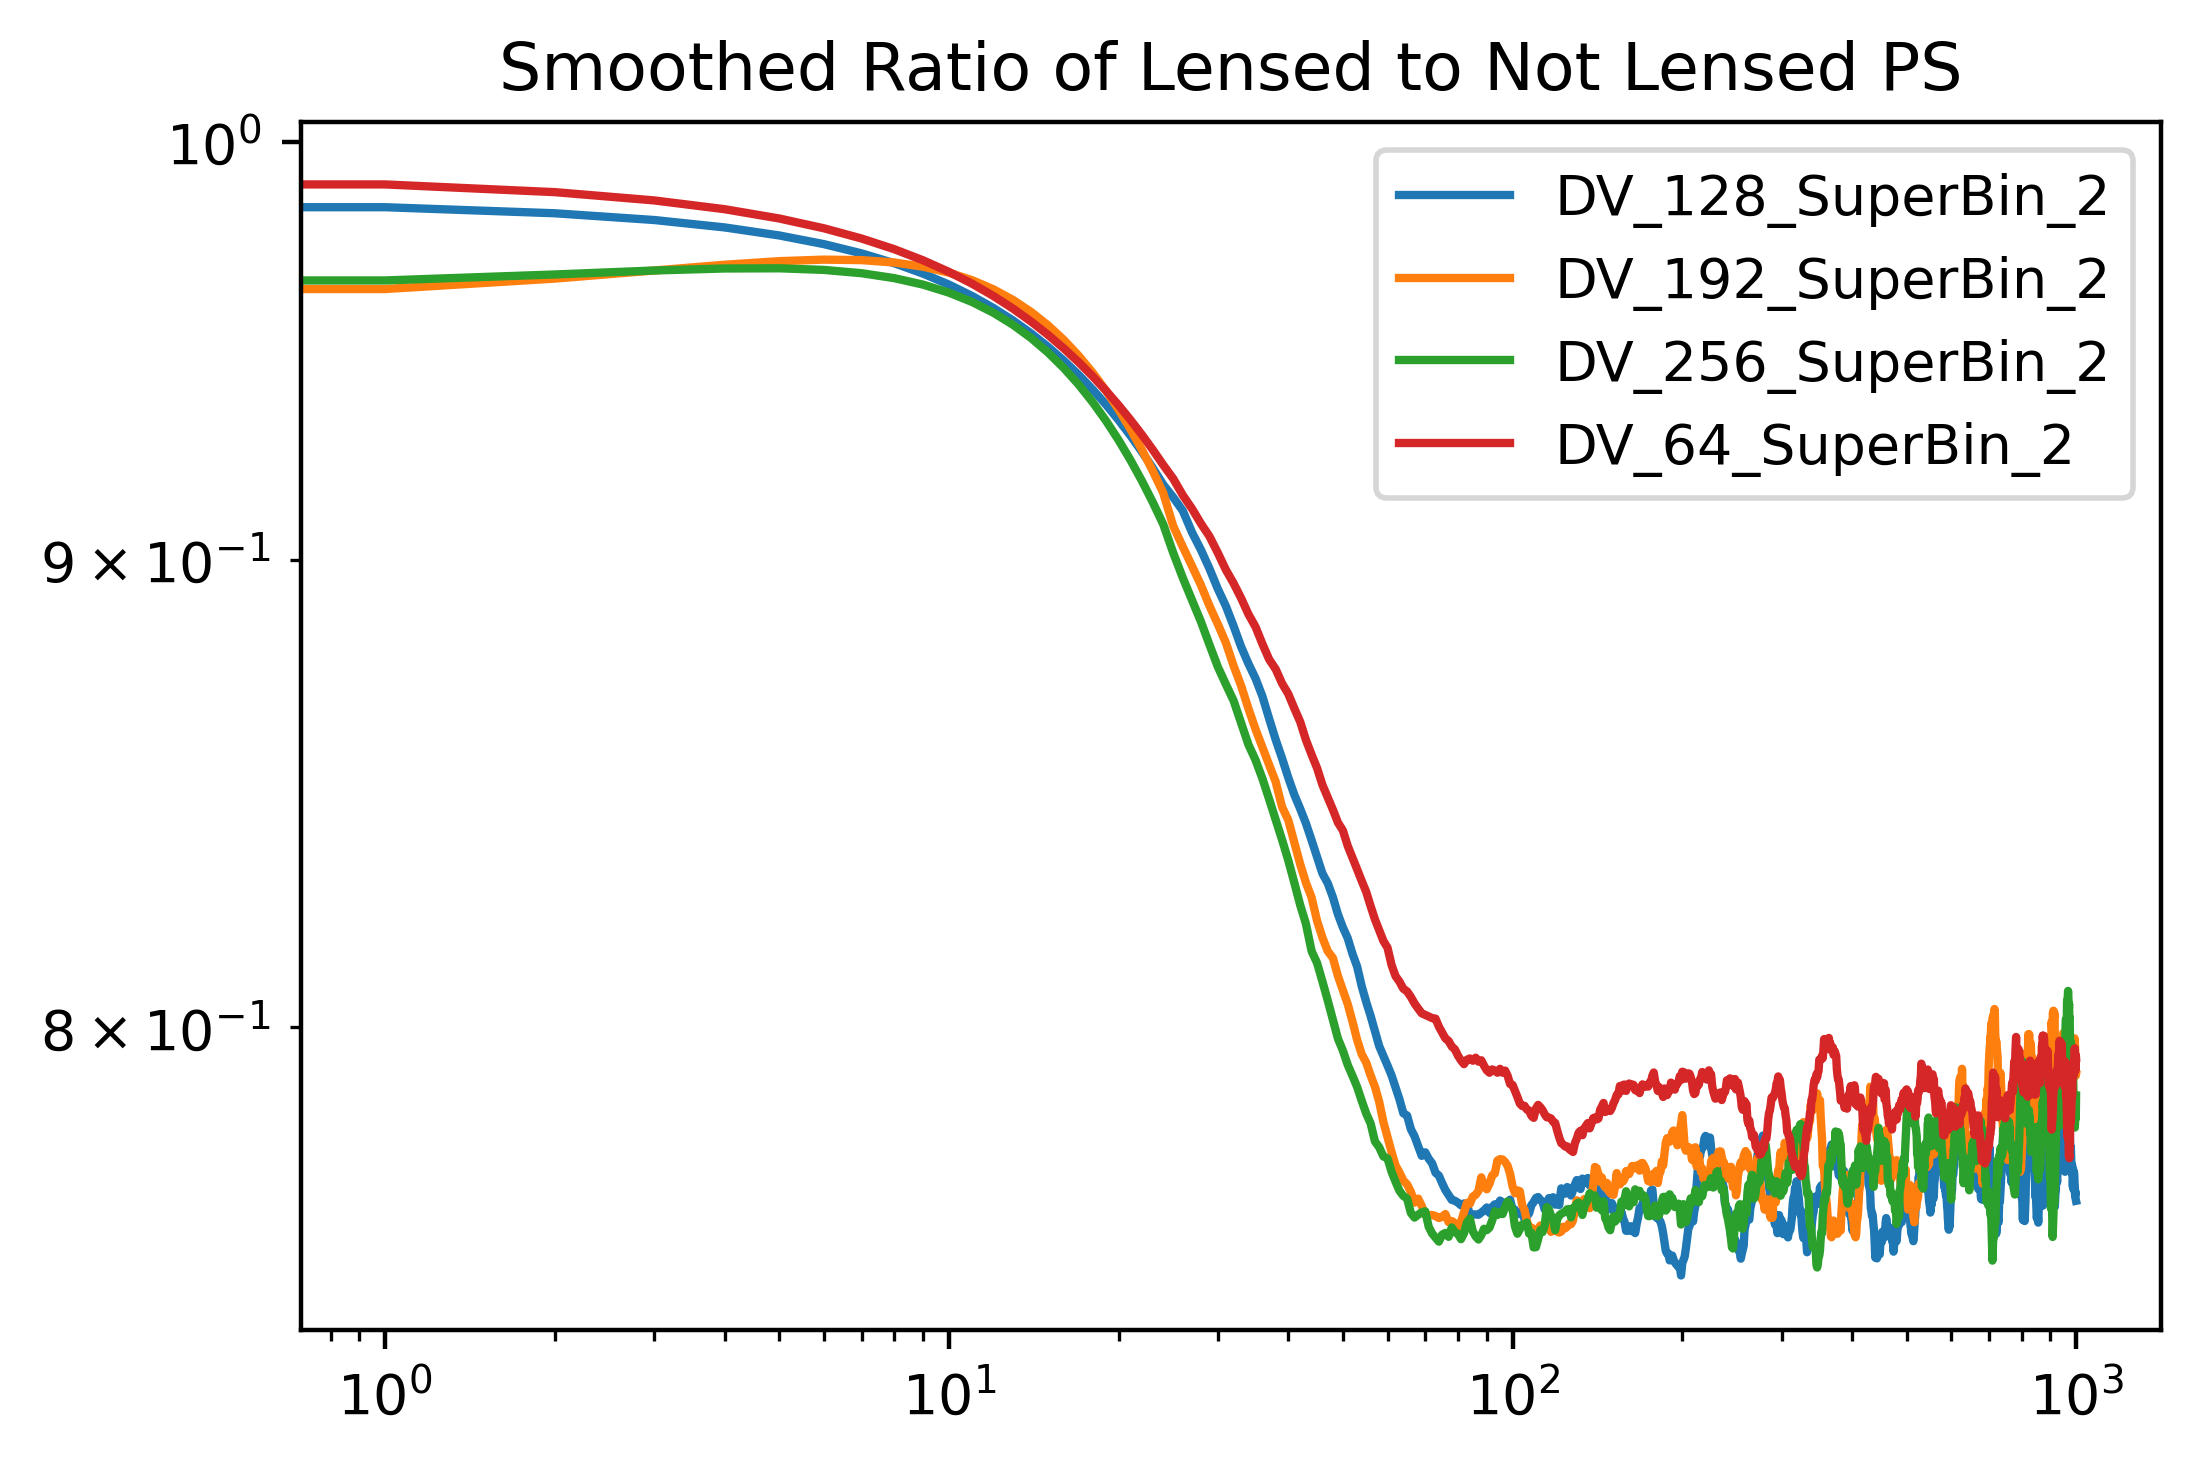

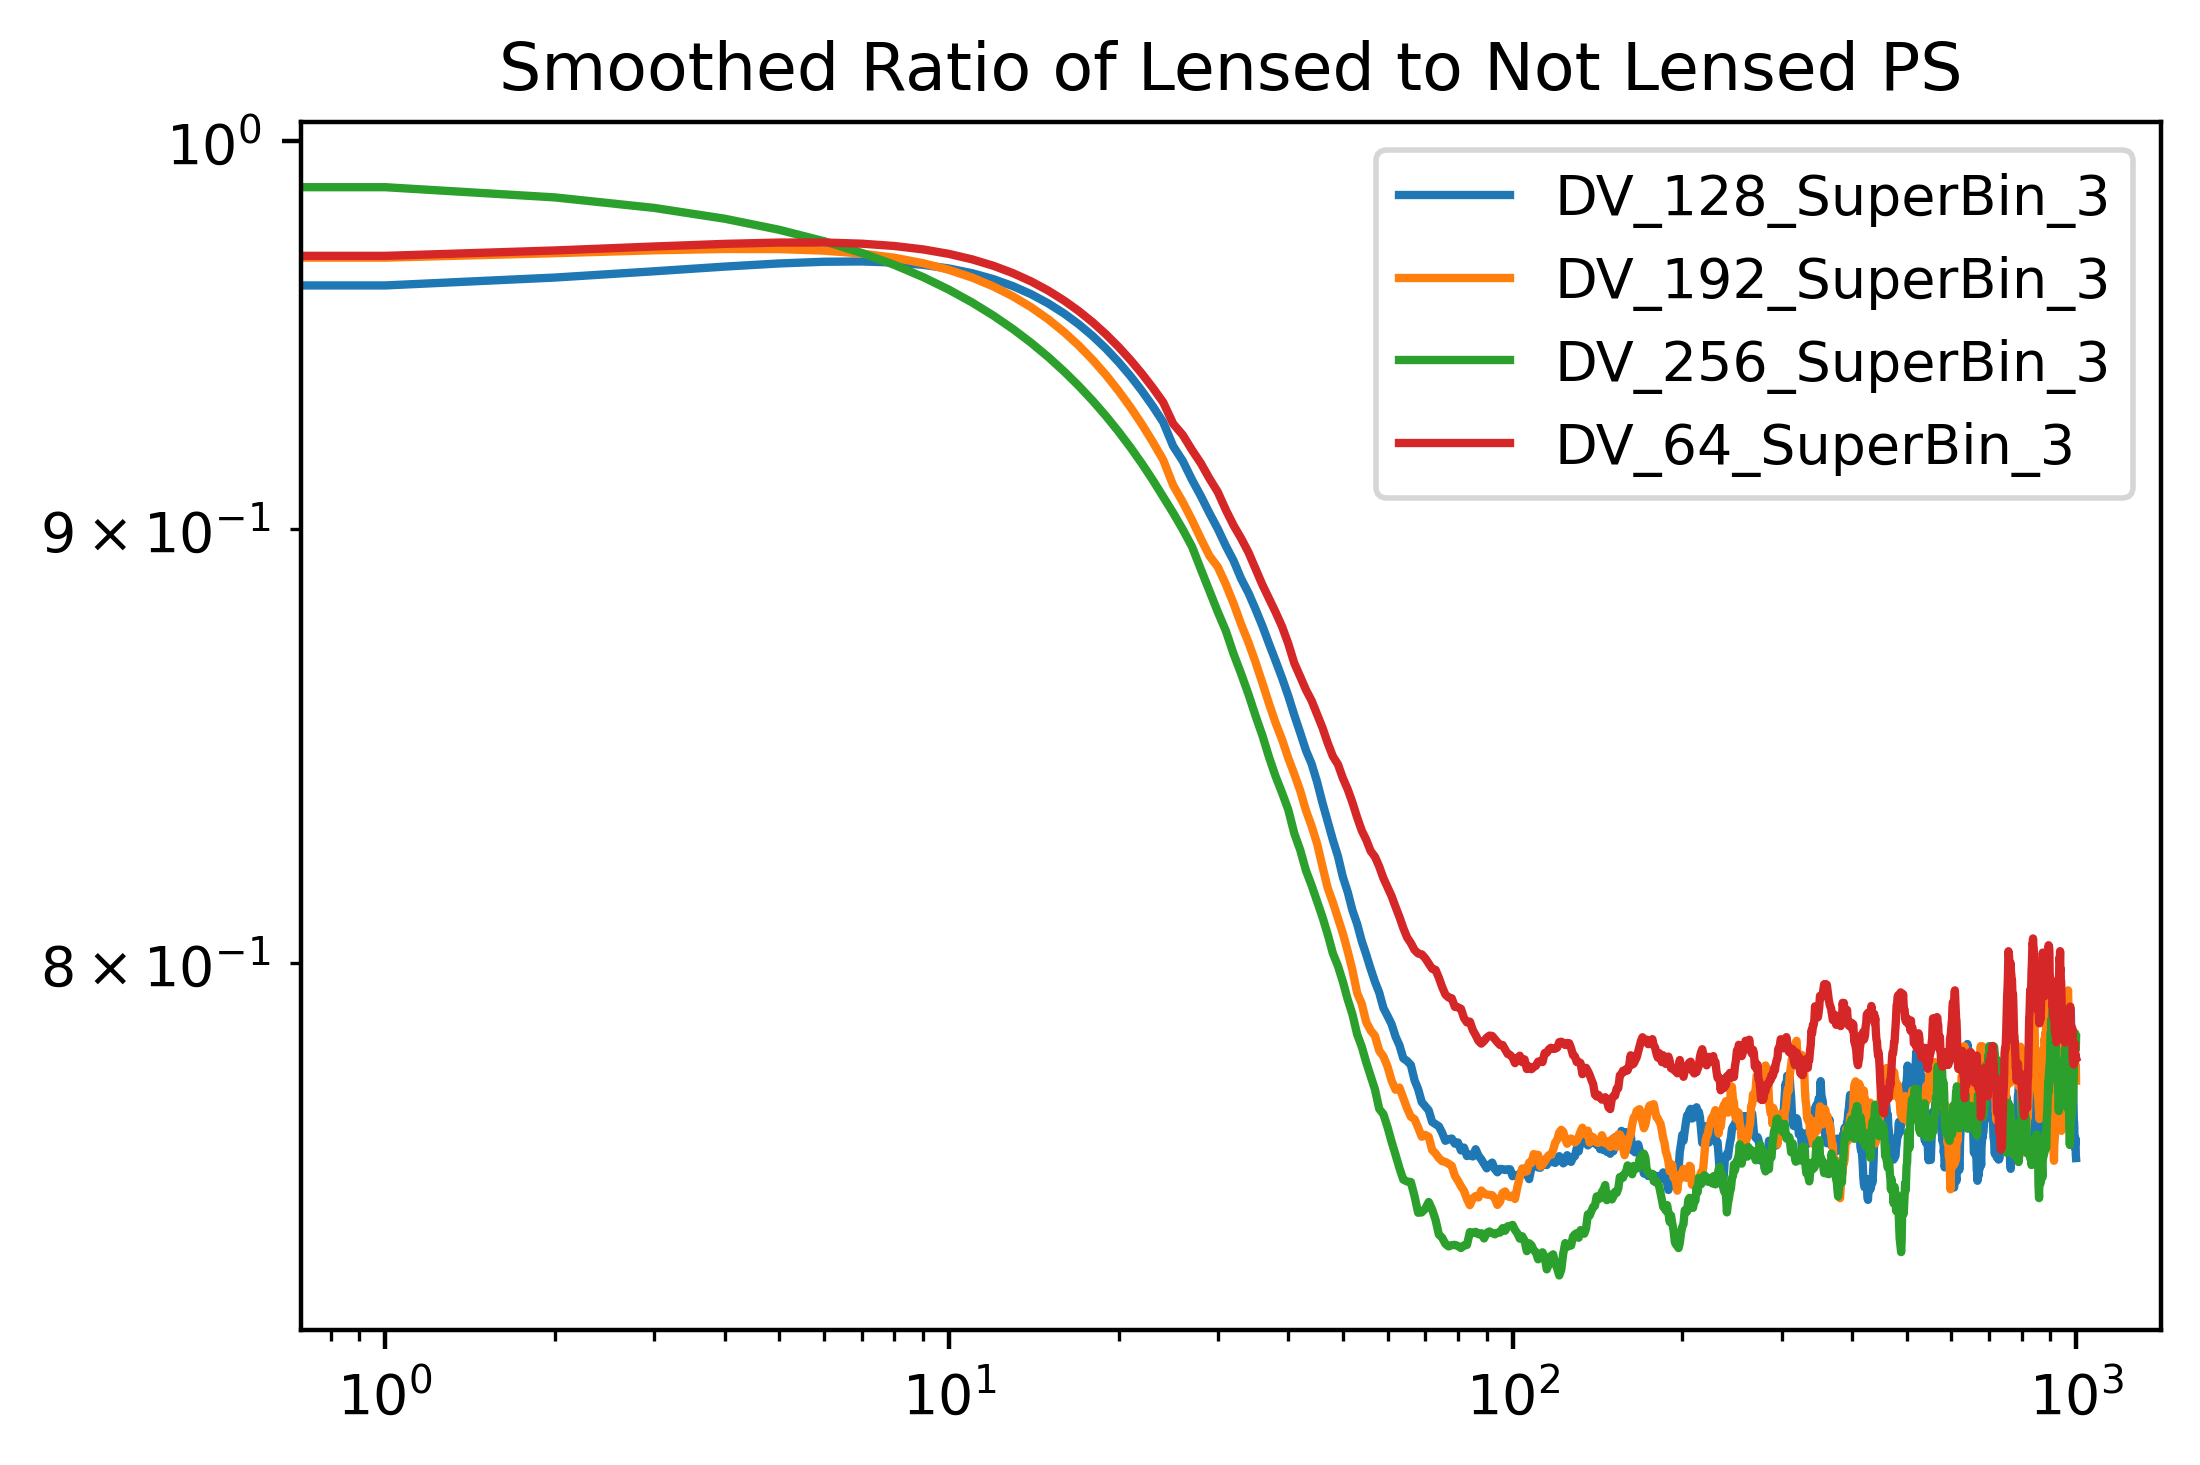

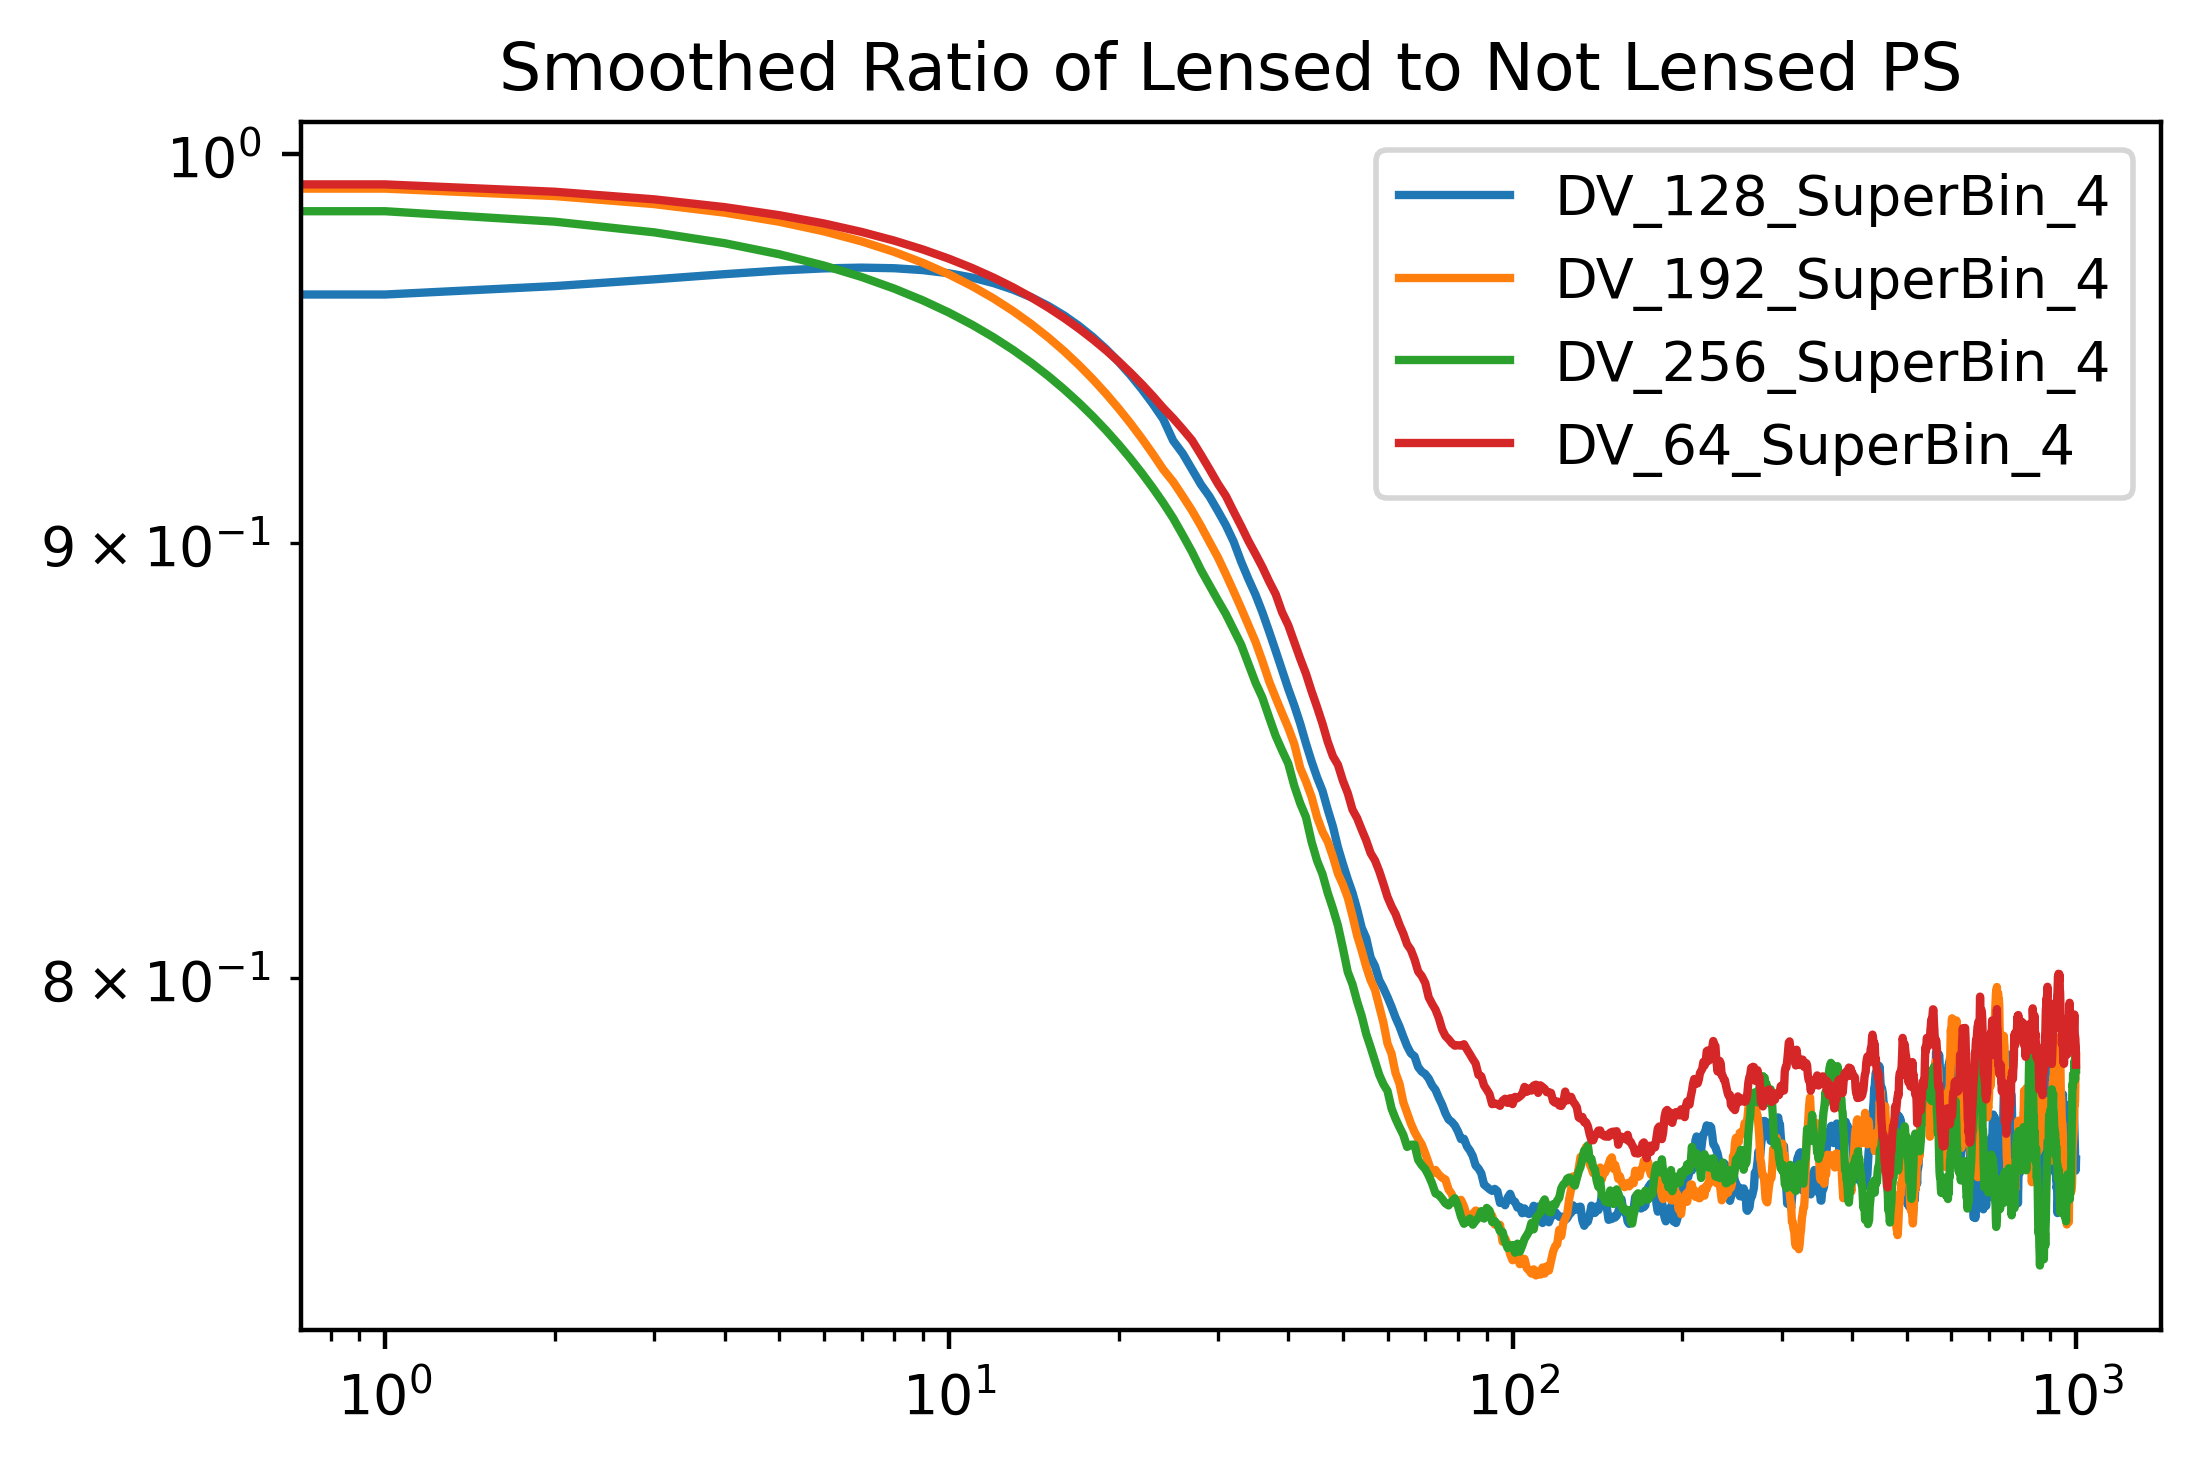

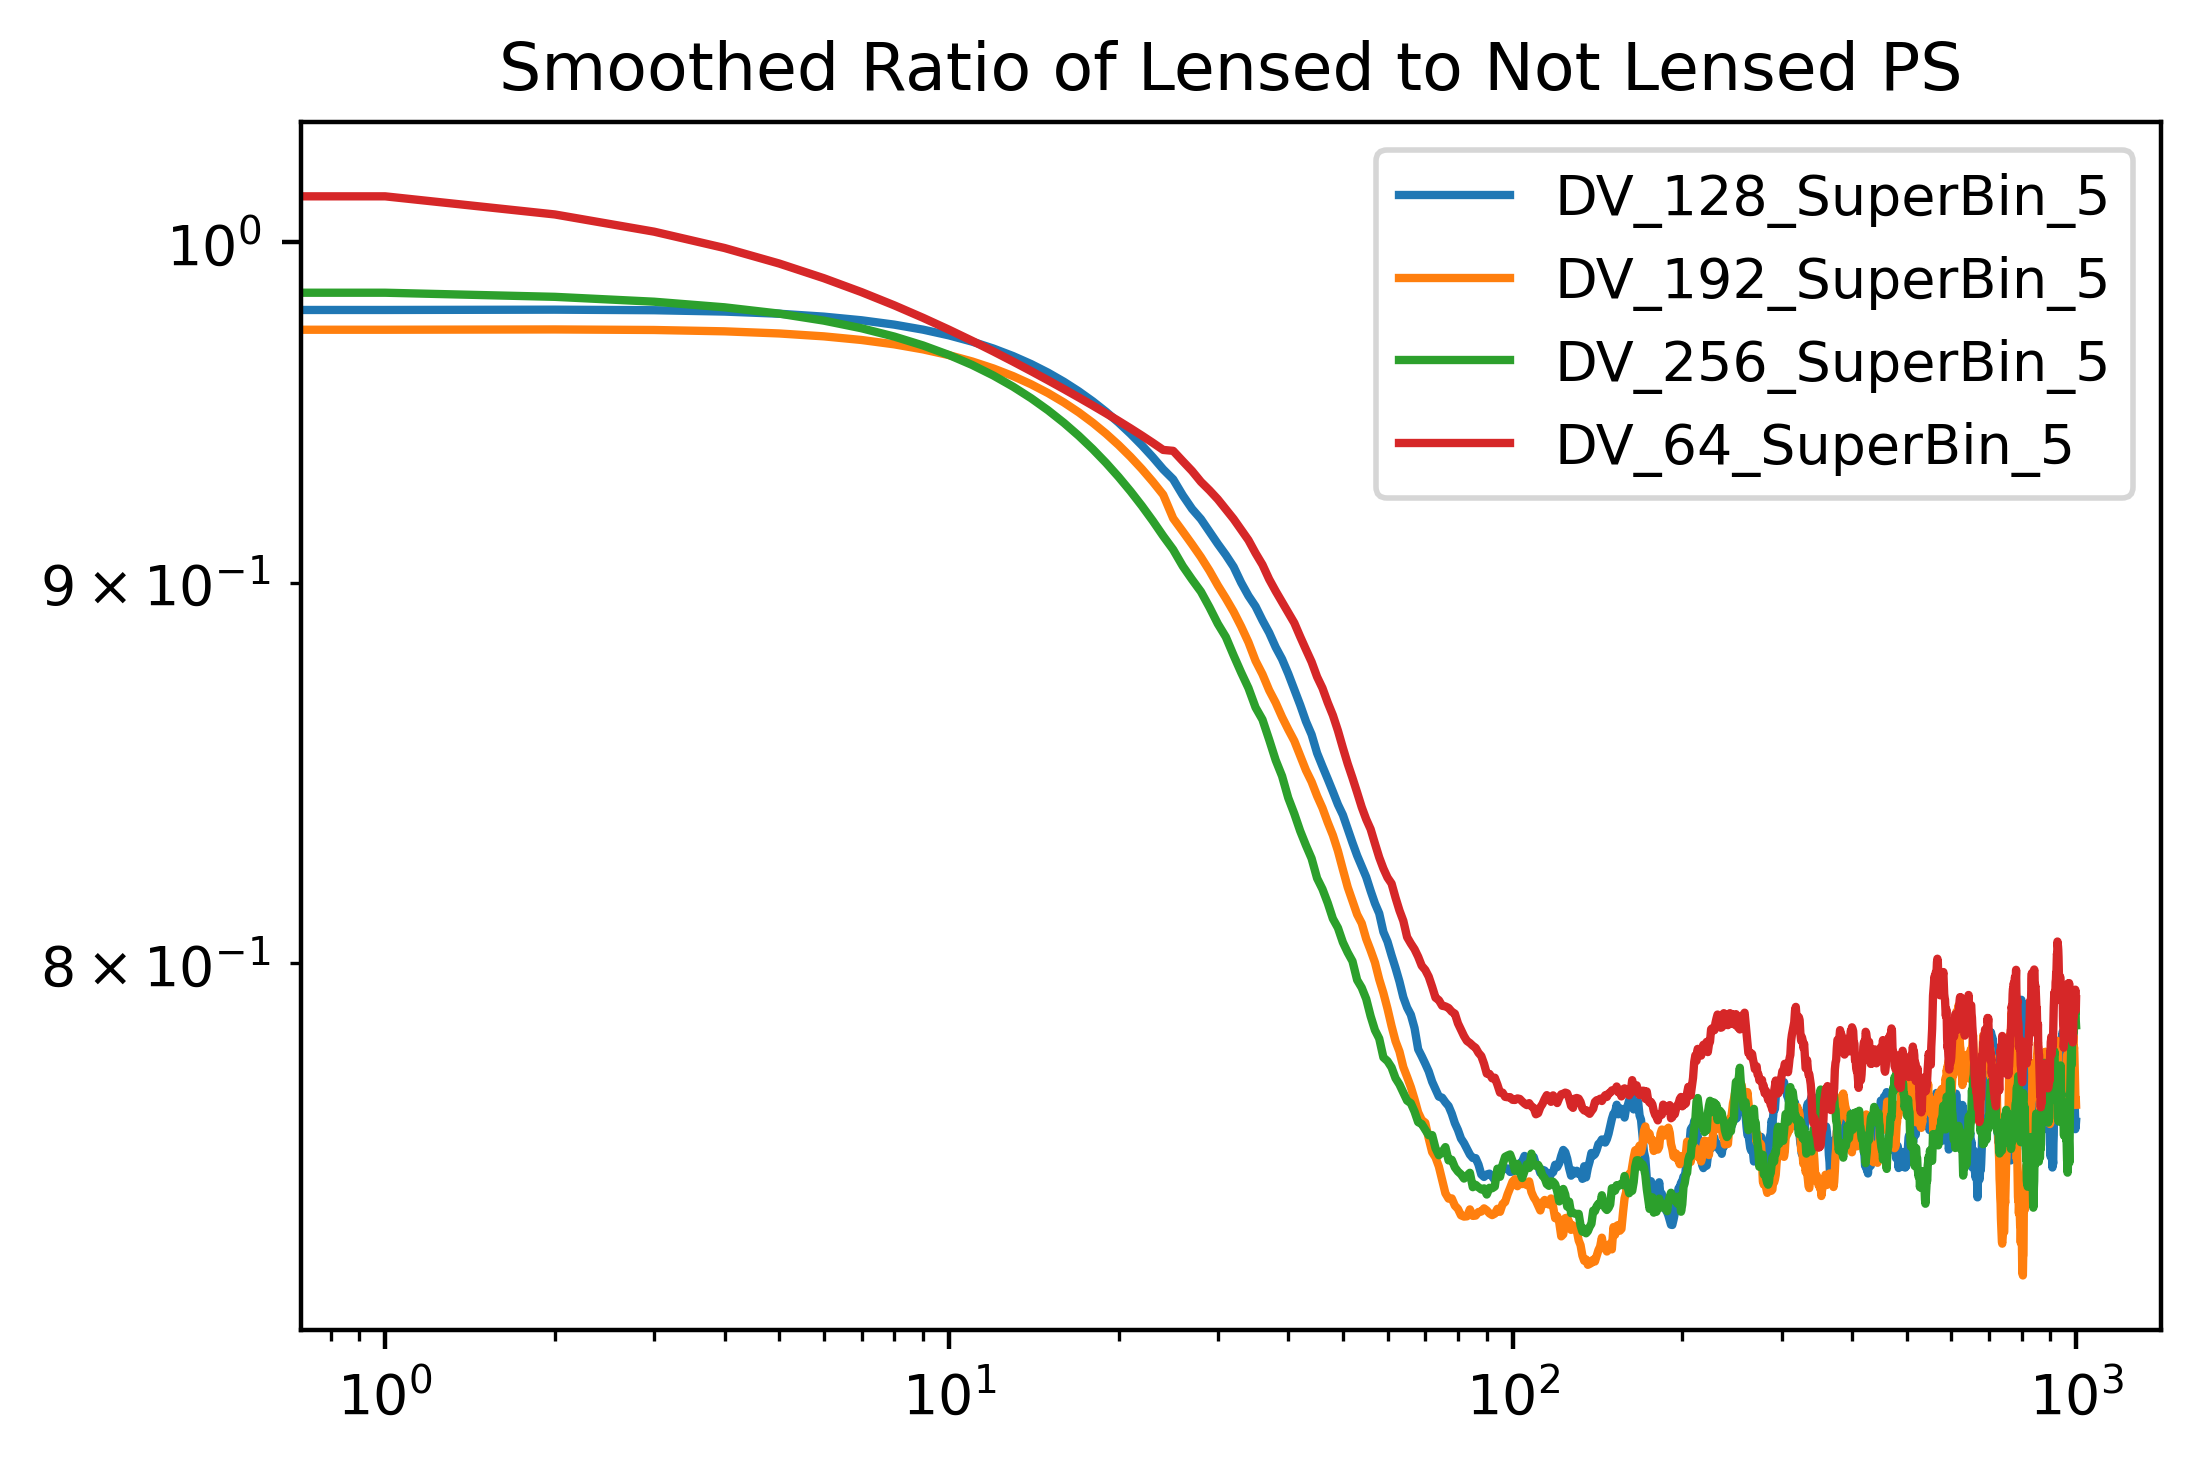

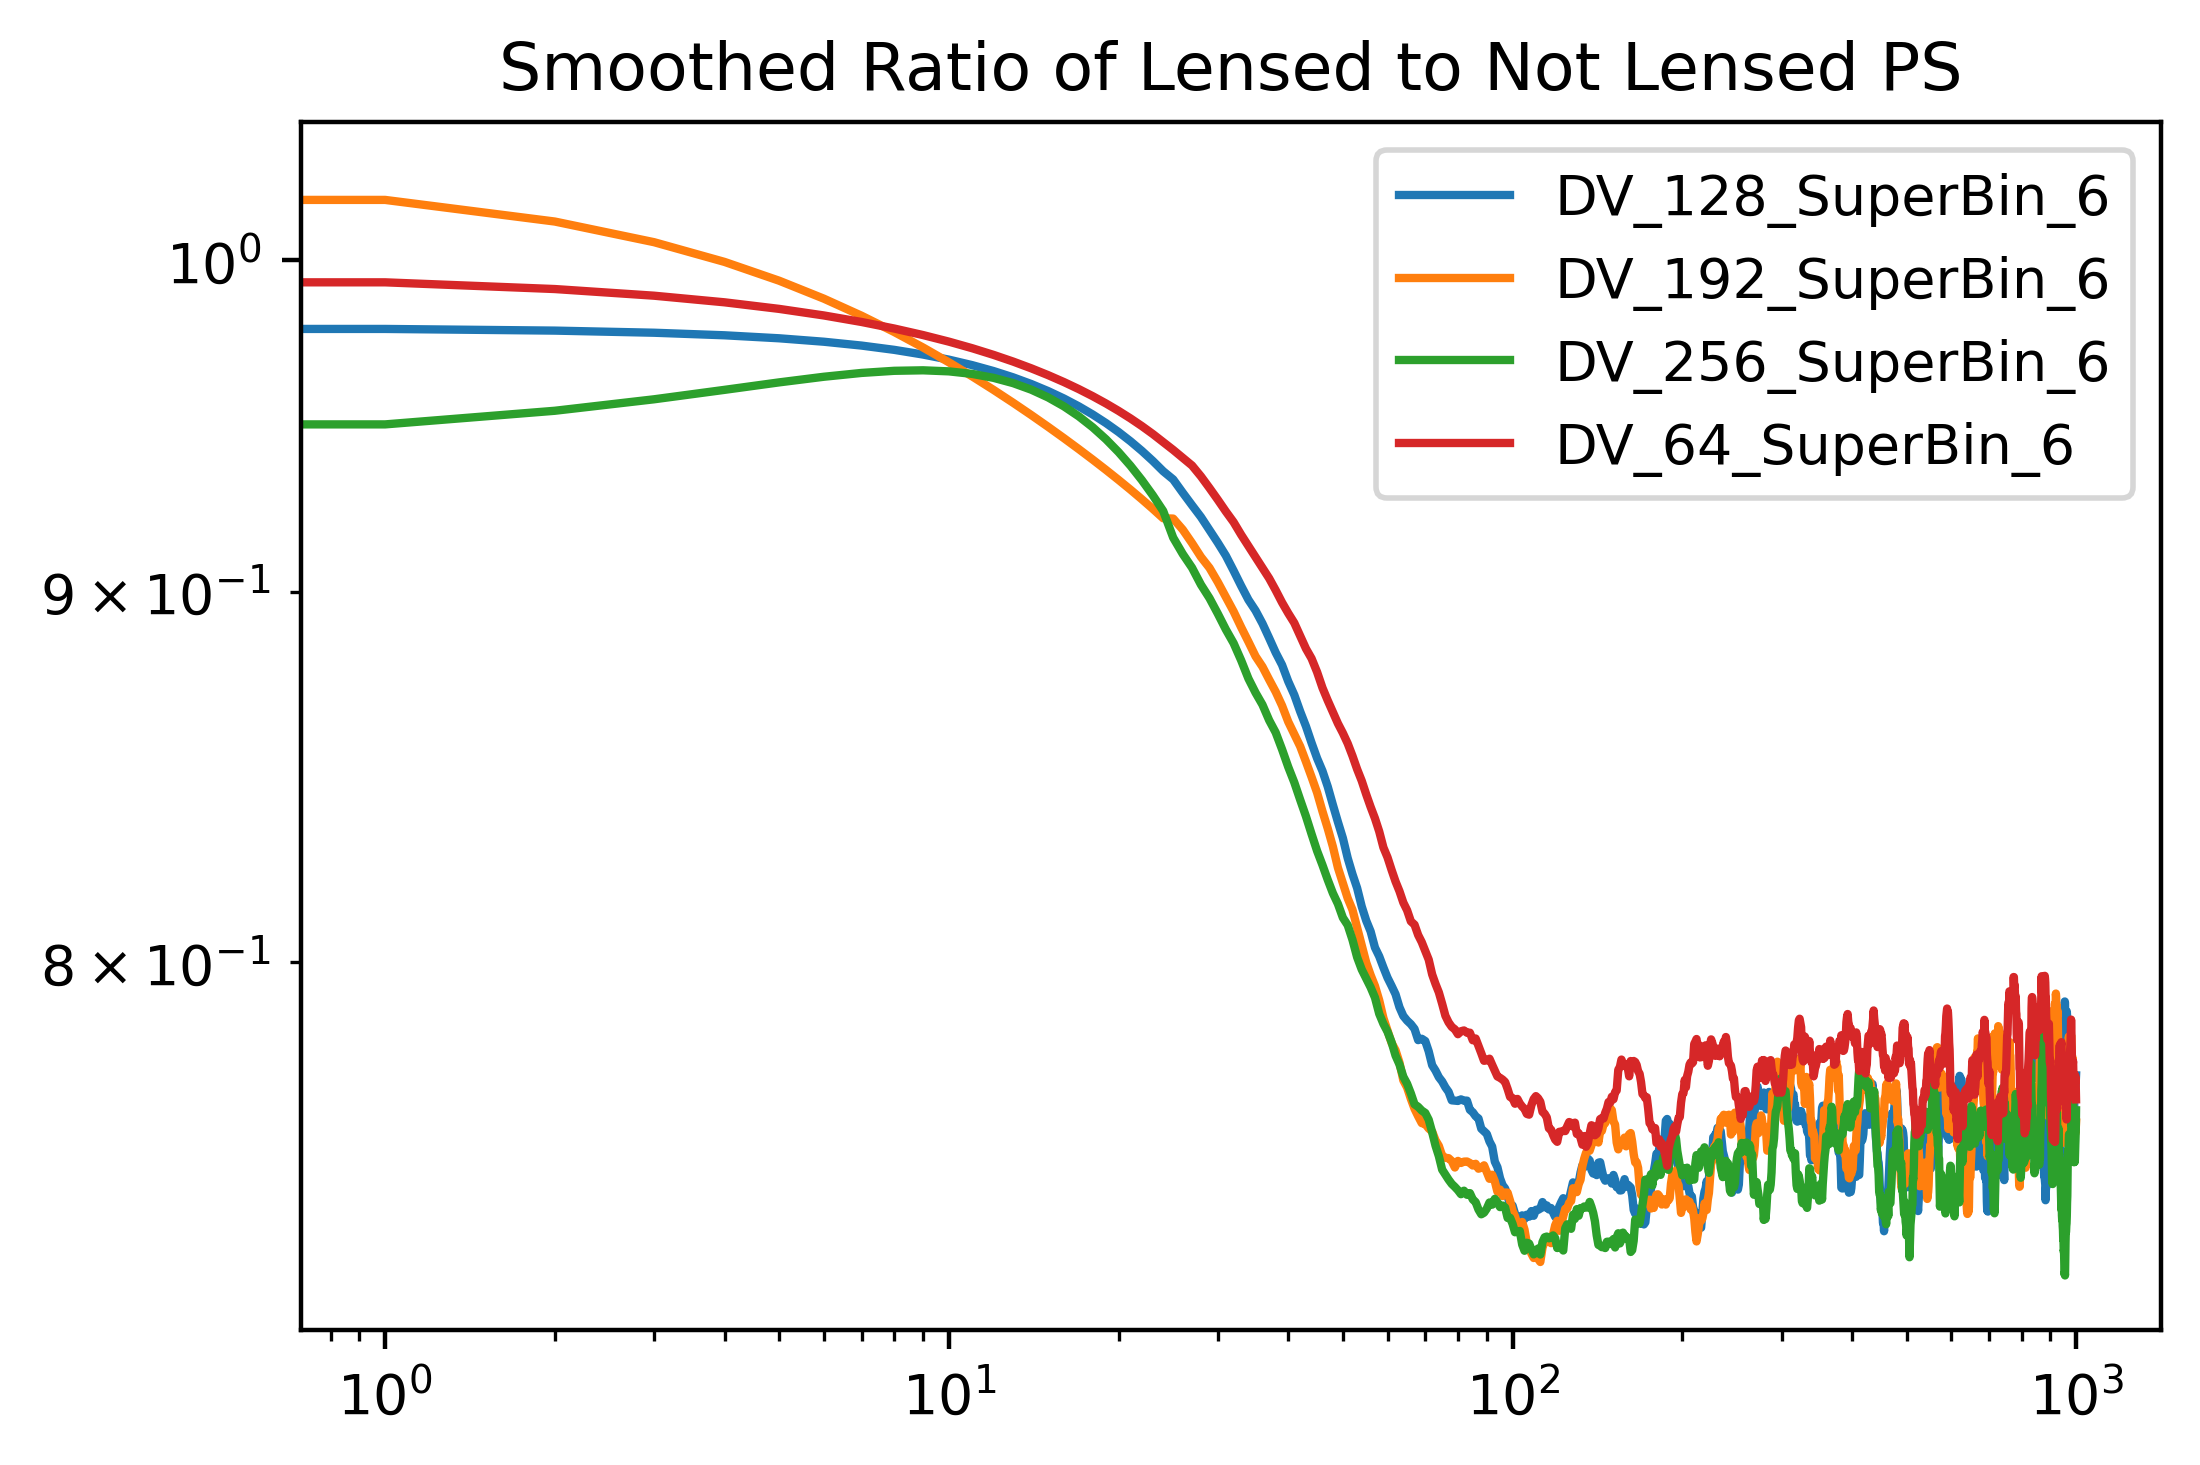

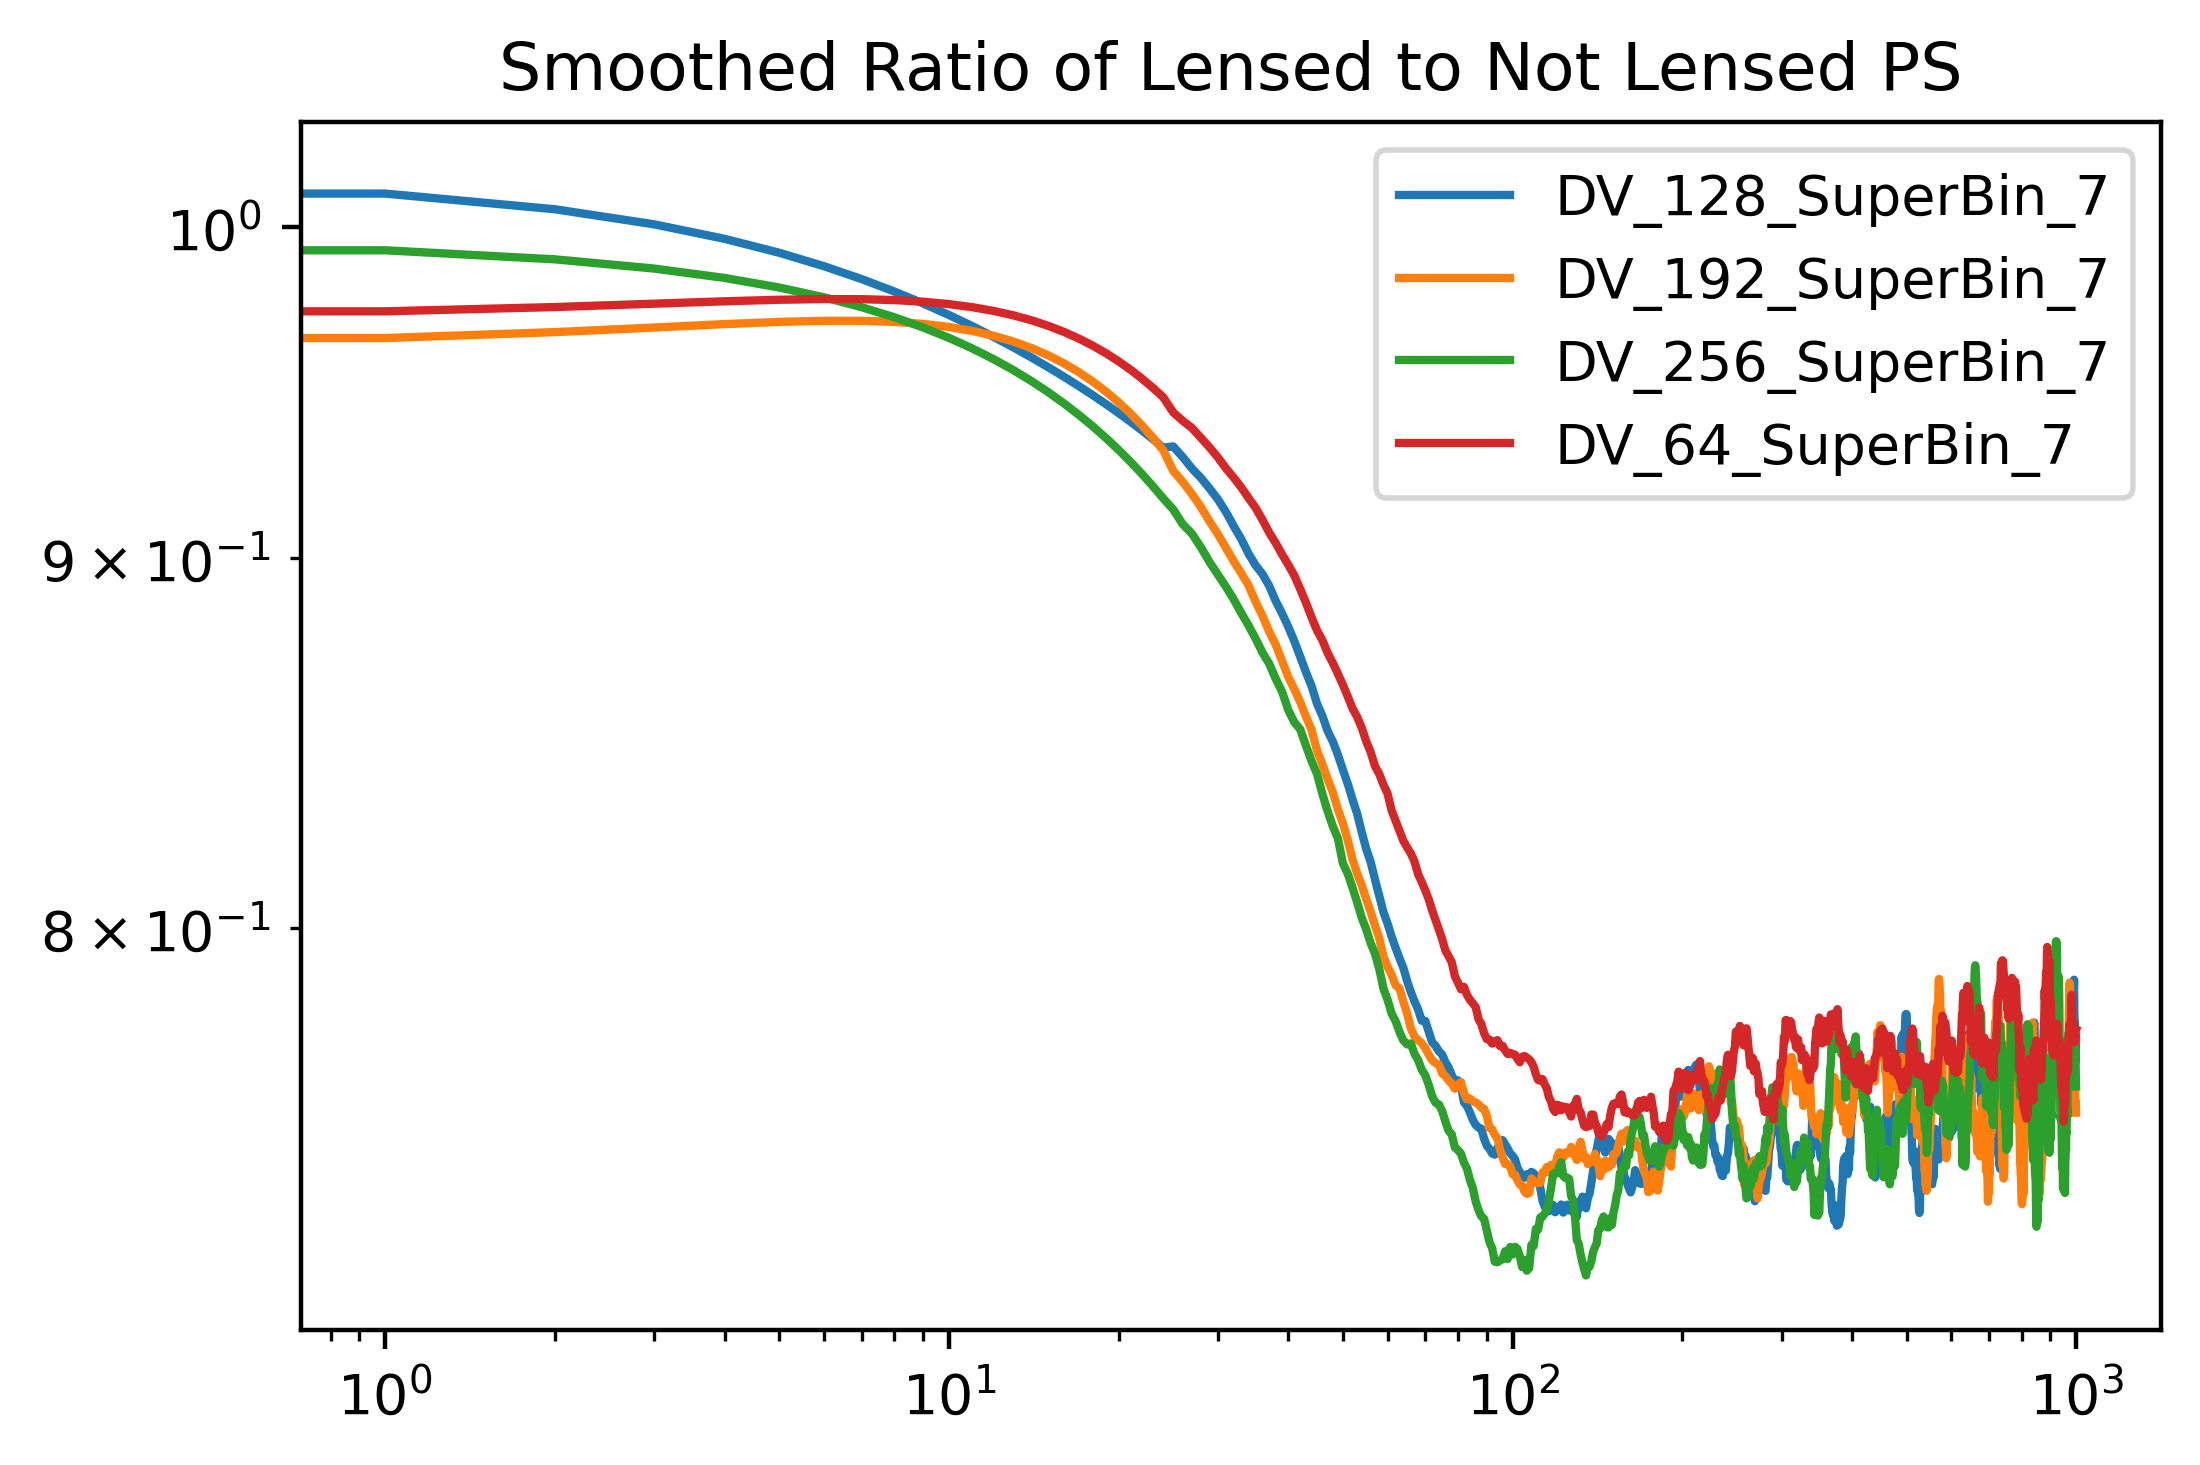

In [51]:
for i in range(9):
    plt.figure(dpi=400)
    plt.loglog(np.transpose(smoothRatio[i:36:9,:1000]));
    plt.legend(titles[i:36:9]);
    plt.title("Smoothed Ratio of Lensed to Not Lensed PS")

-0.17804450354486348
-52.622554895216034
1.980621416695059
11.947164465141231
0.025009416888042767
2.8433576471666884
2.465168125438896
2.6470790669656354
-0.36717456498842216


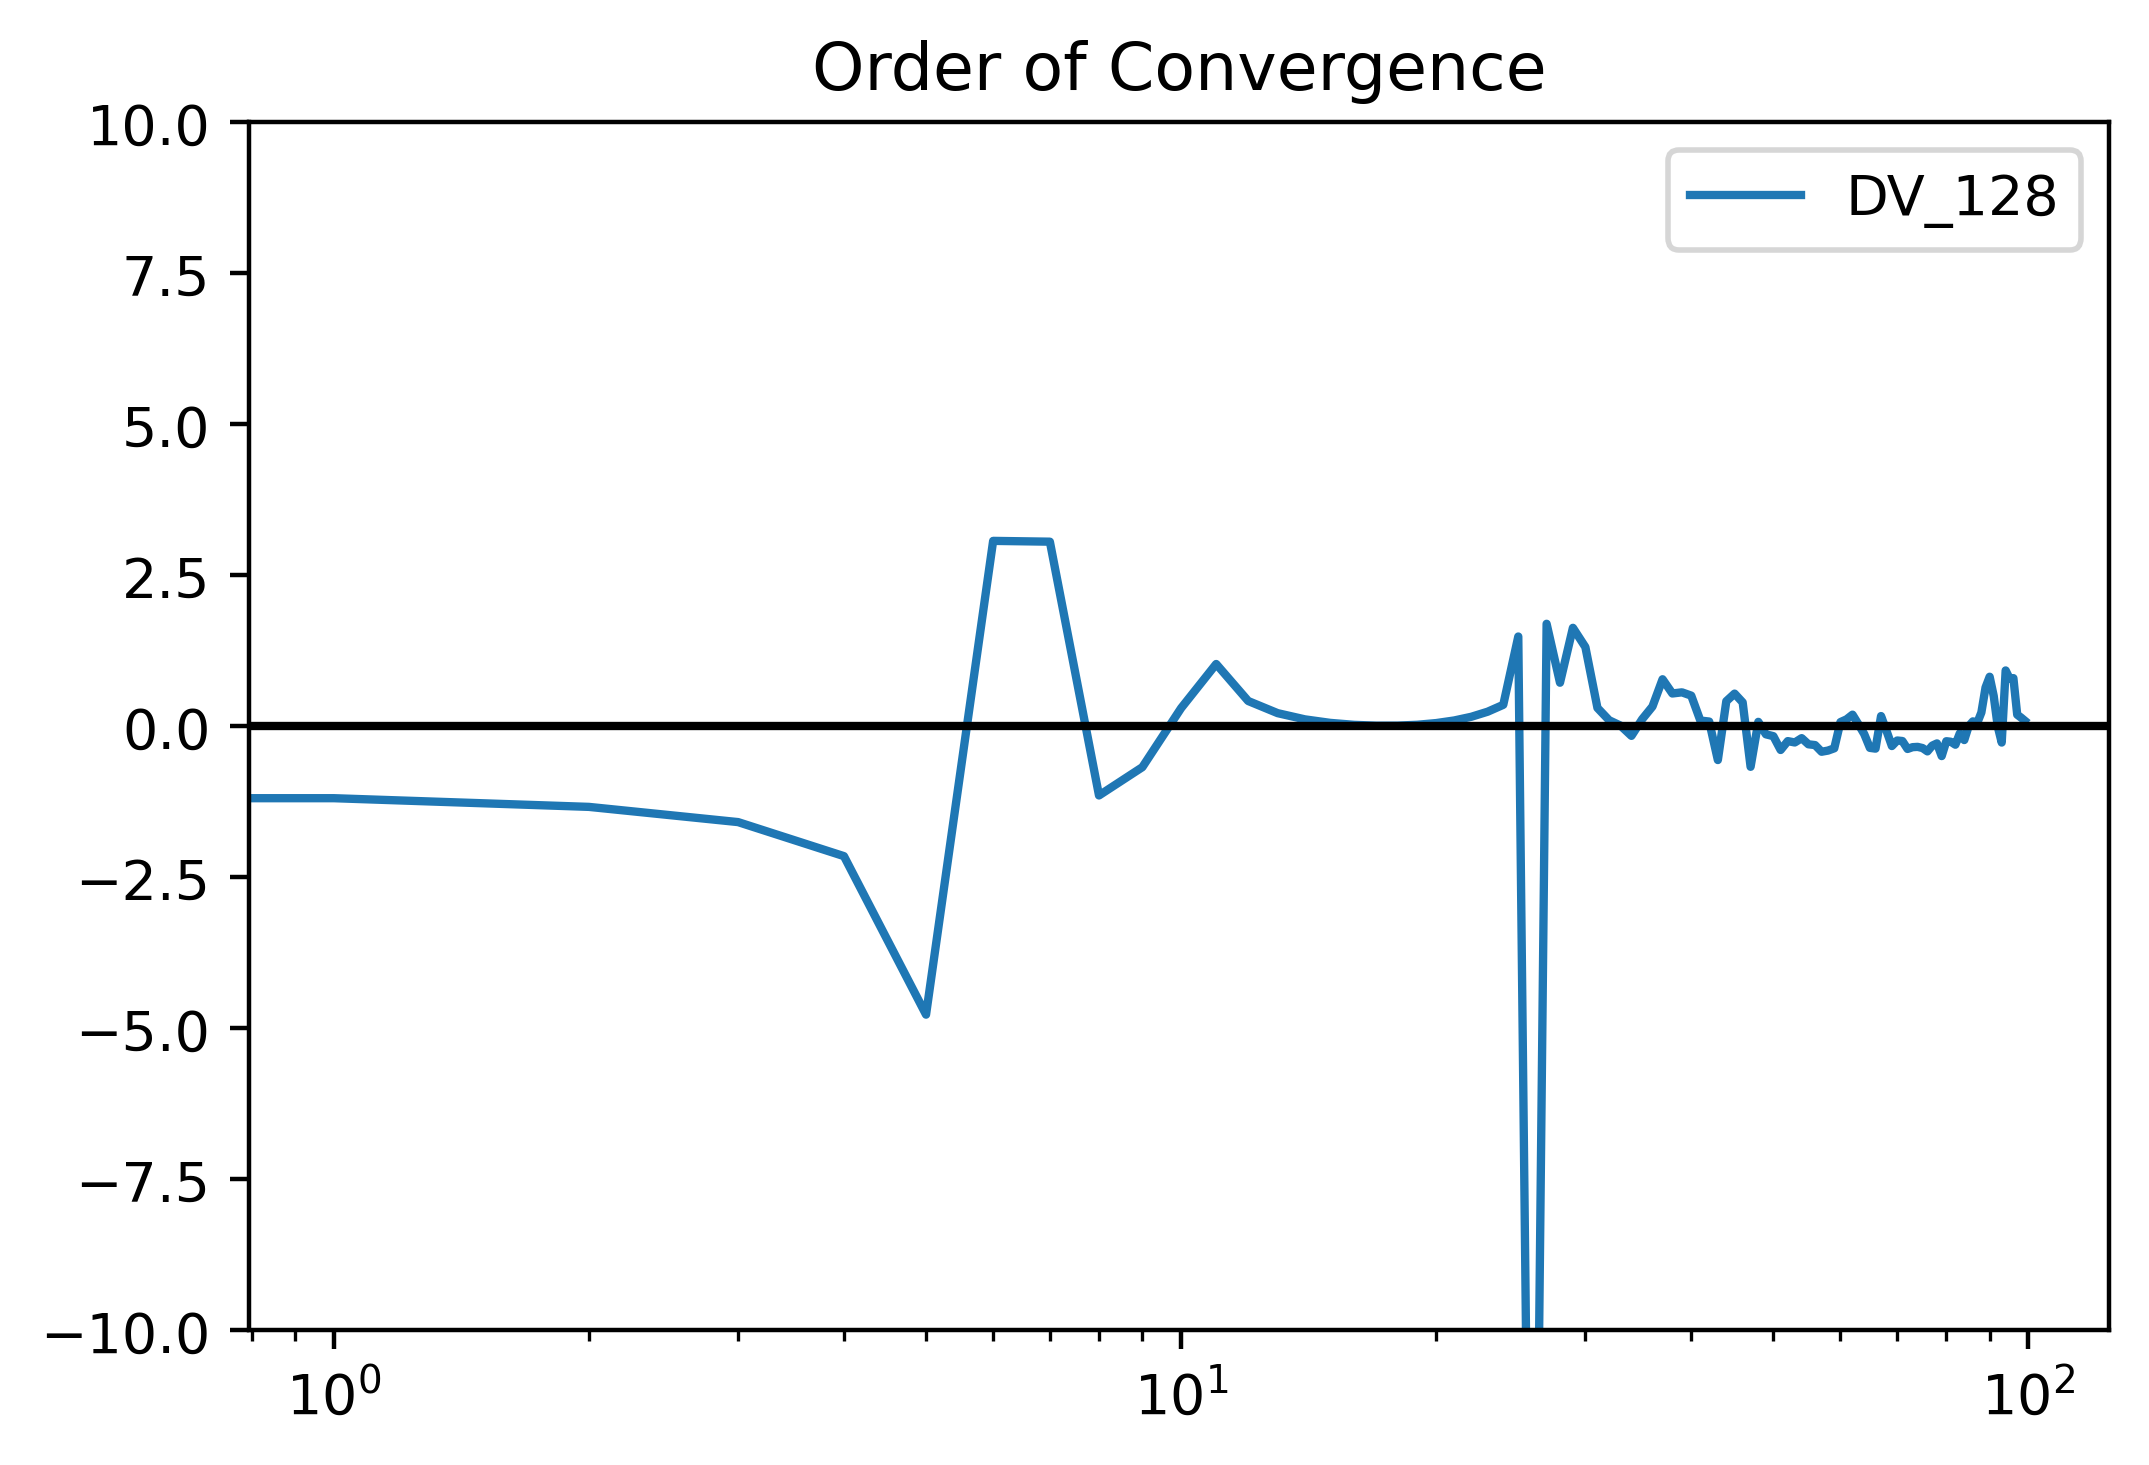

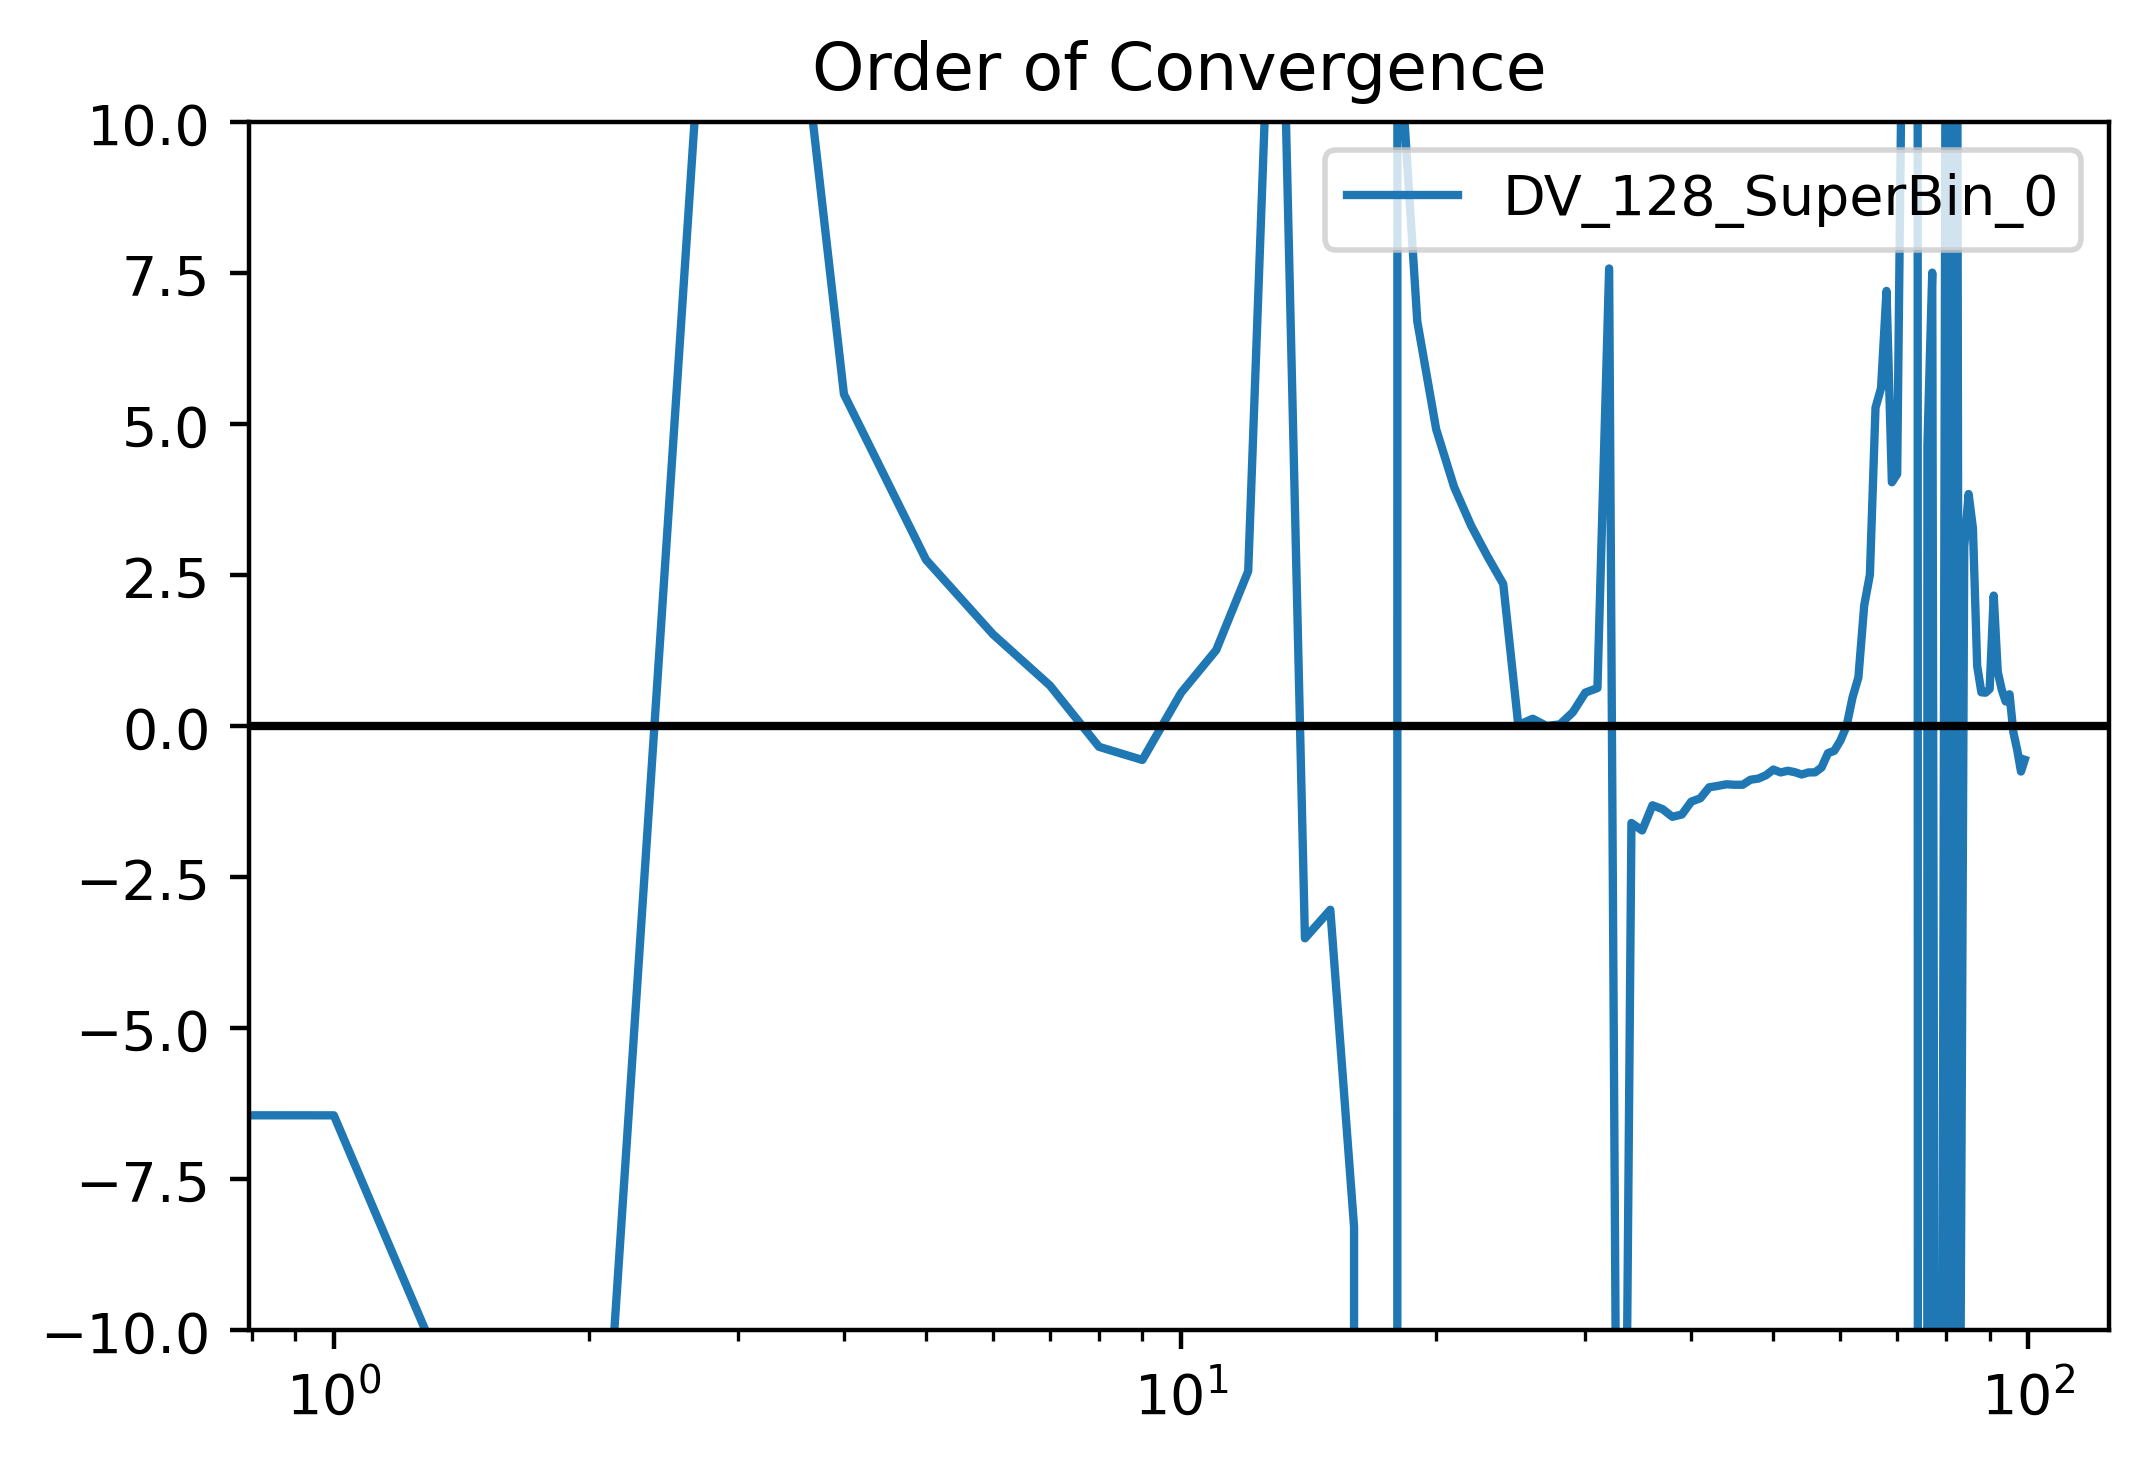

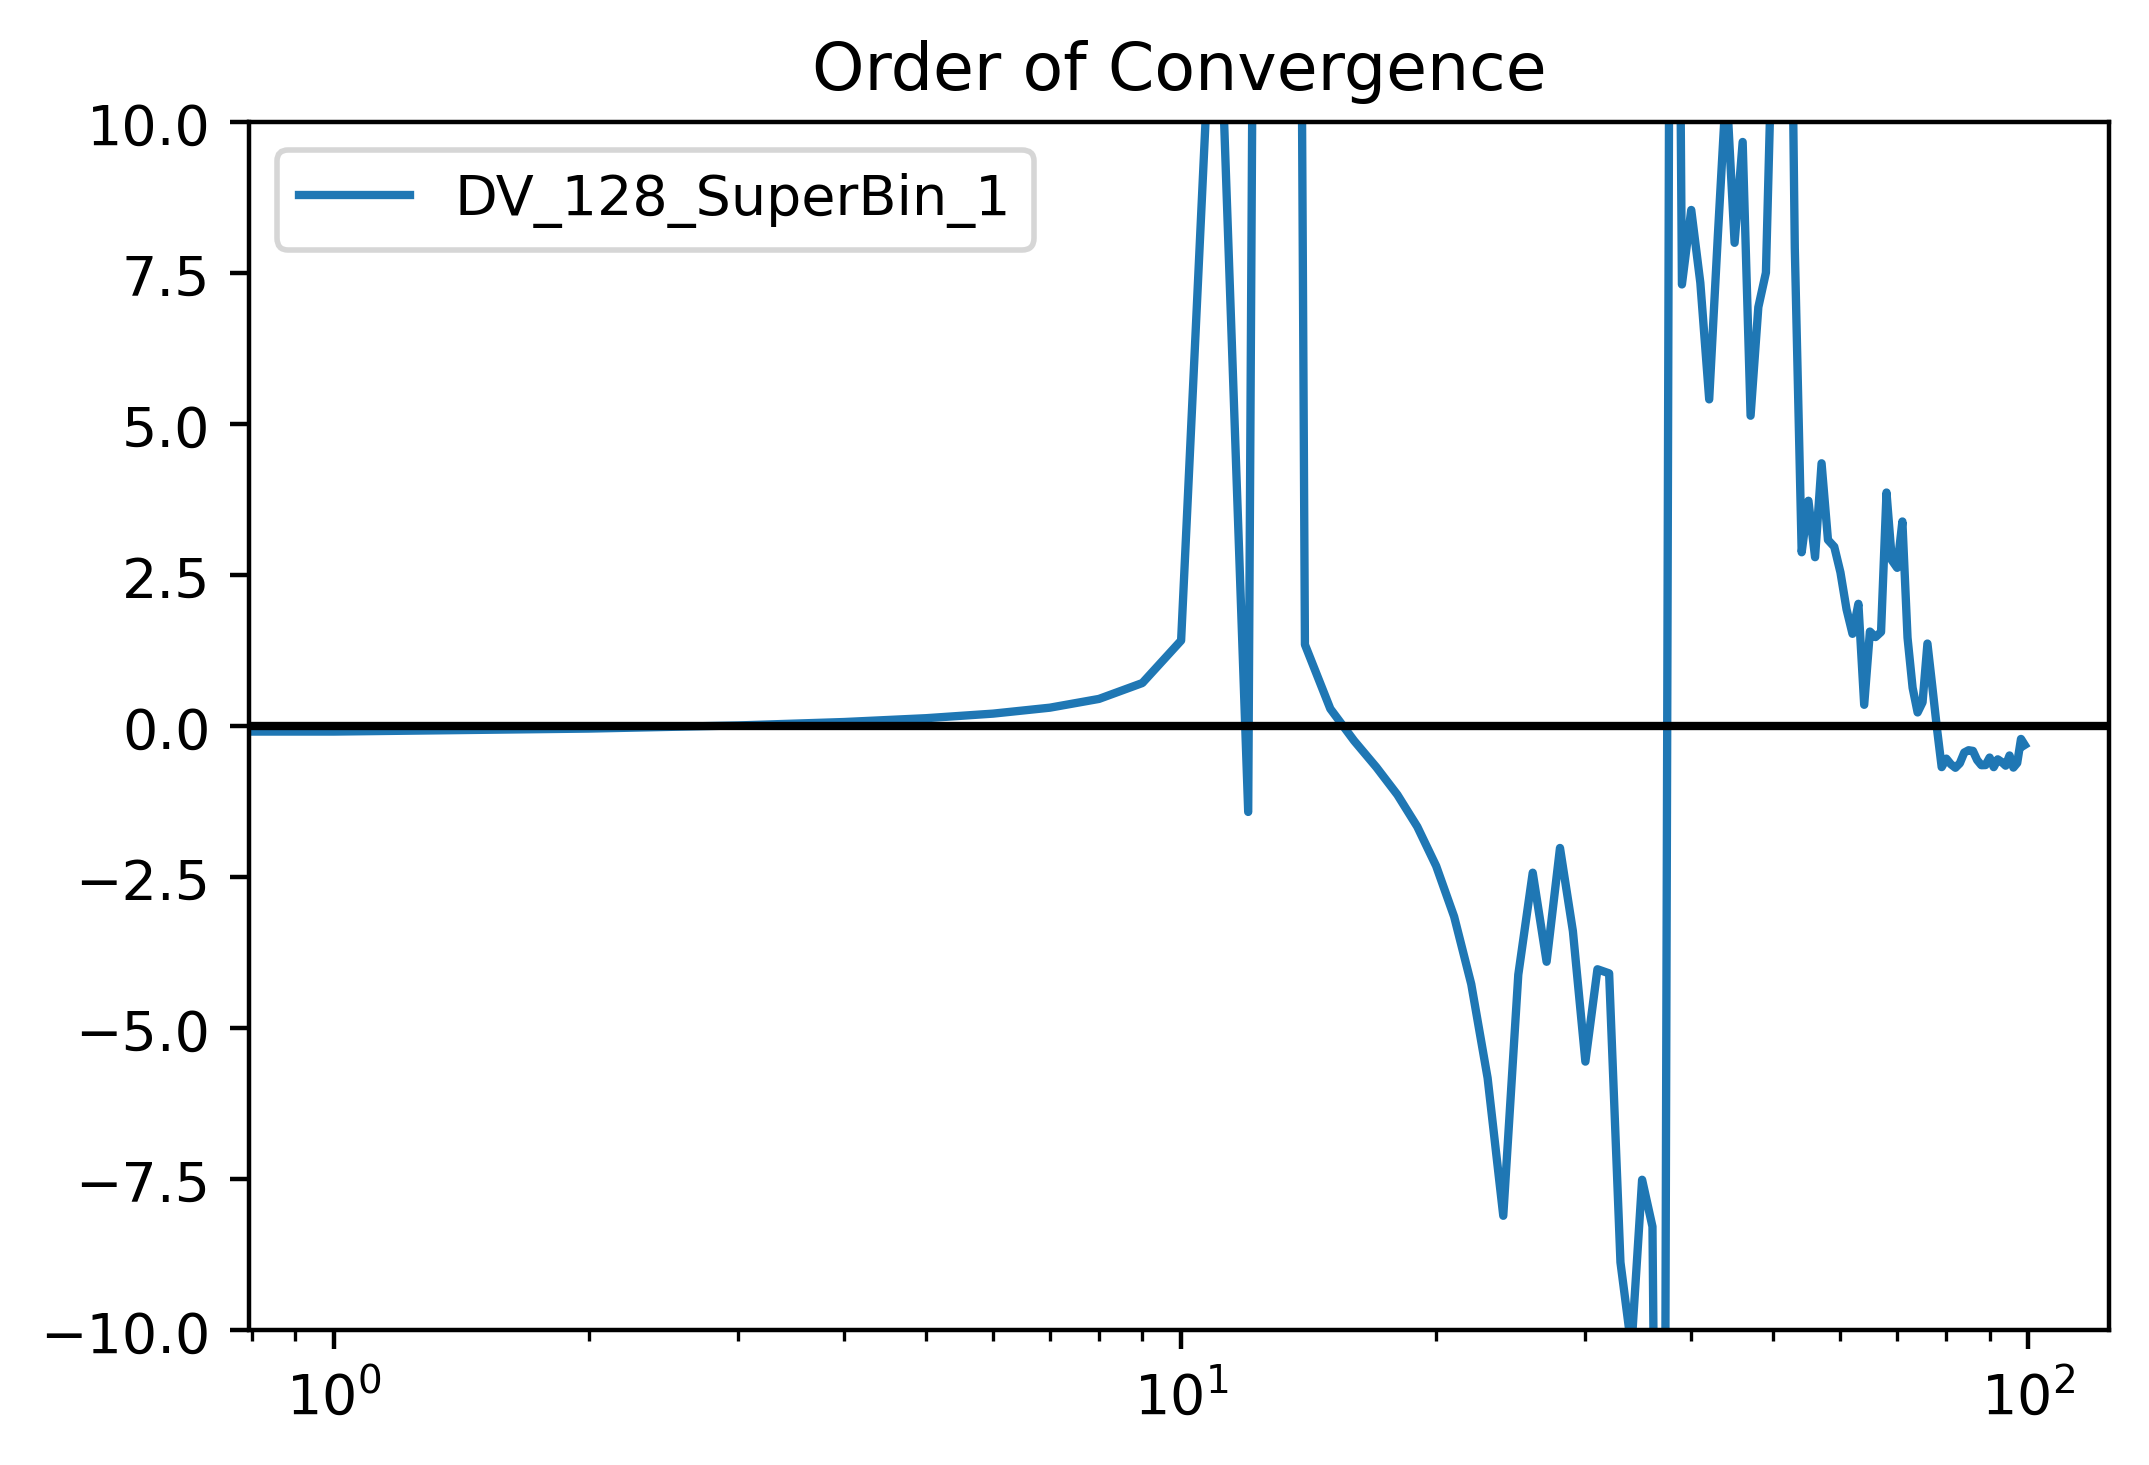

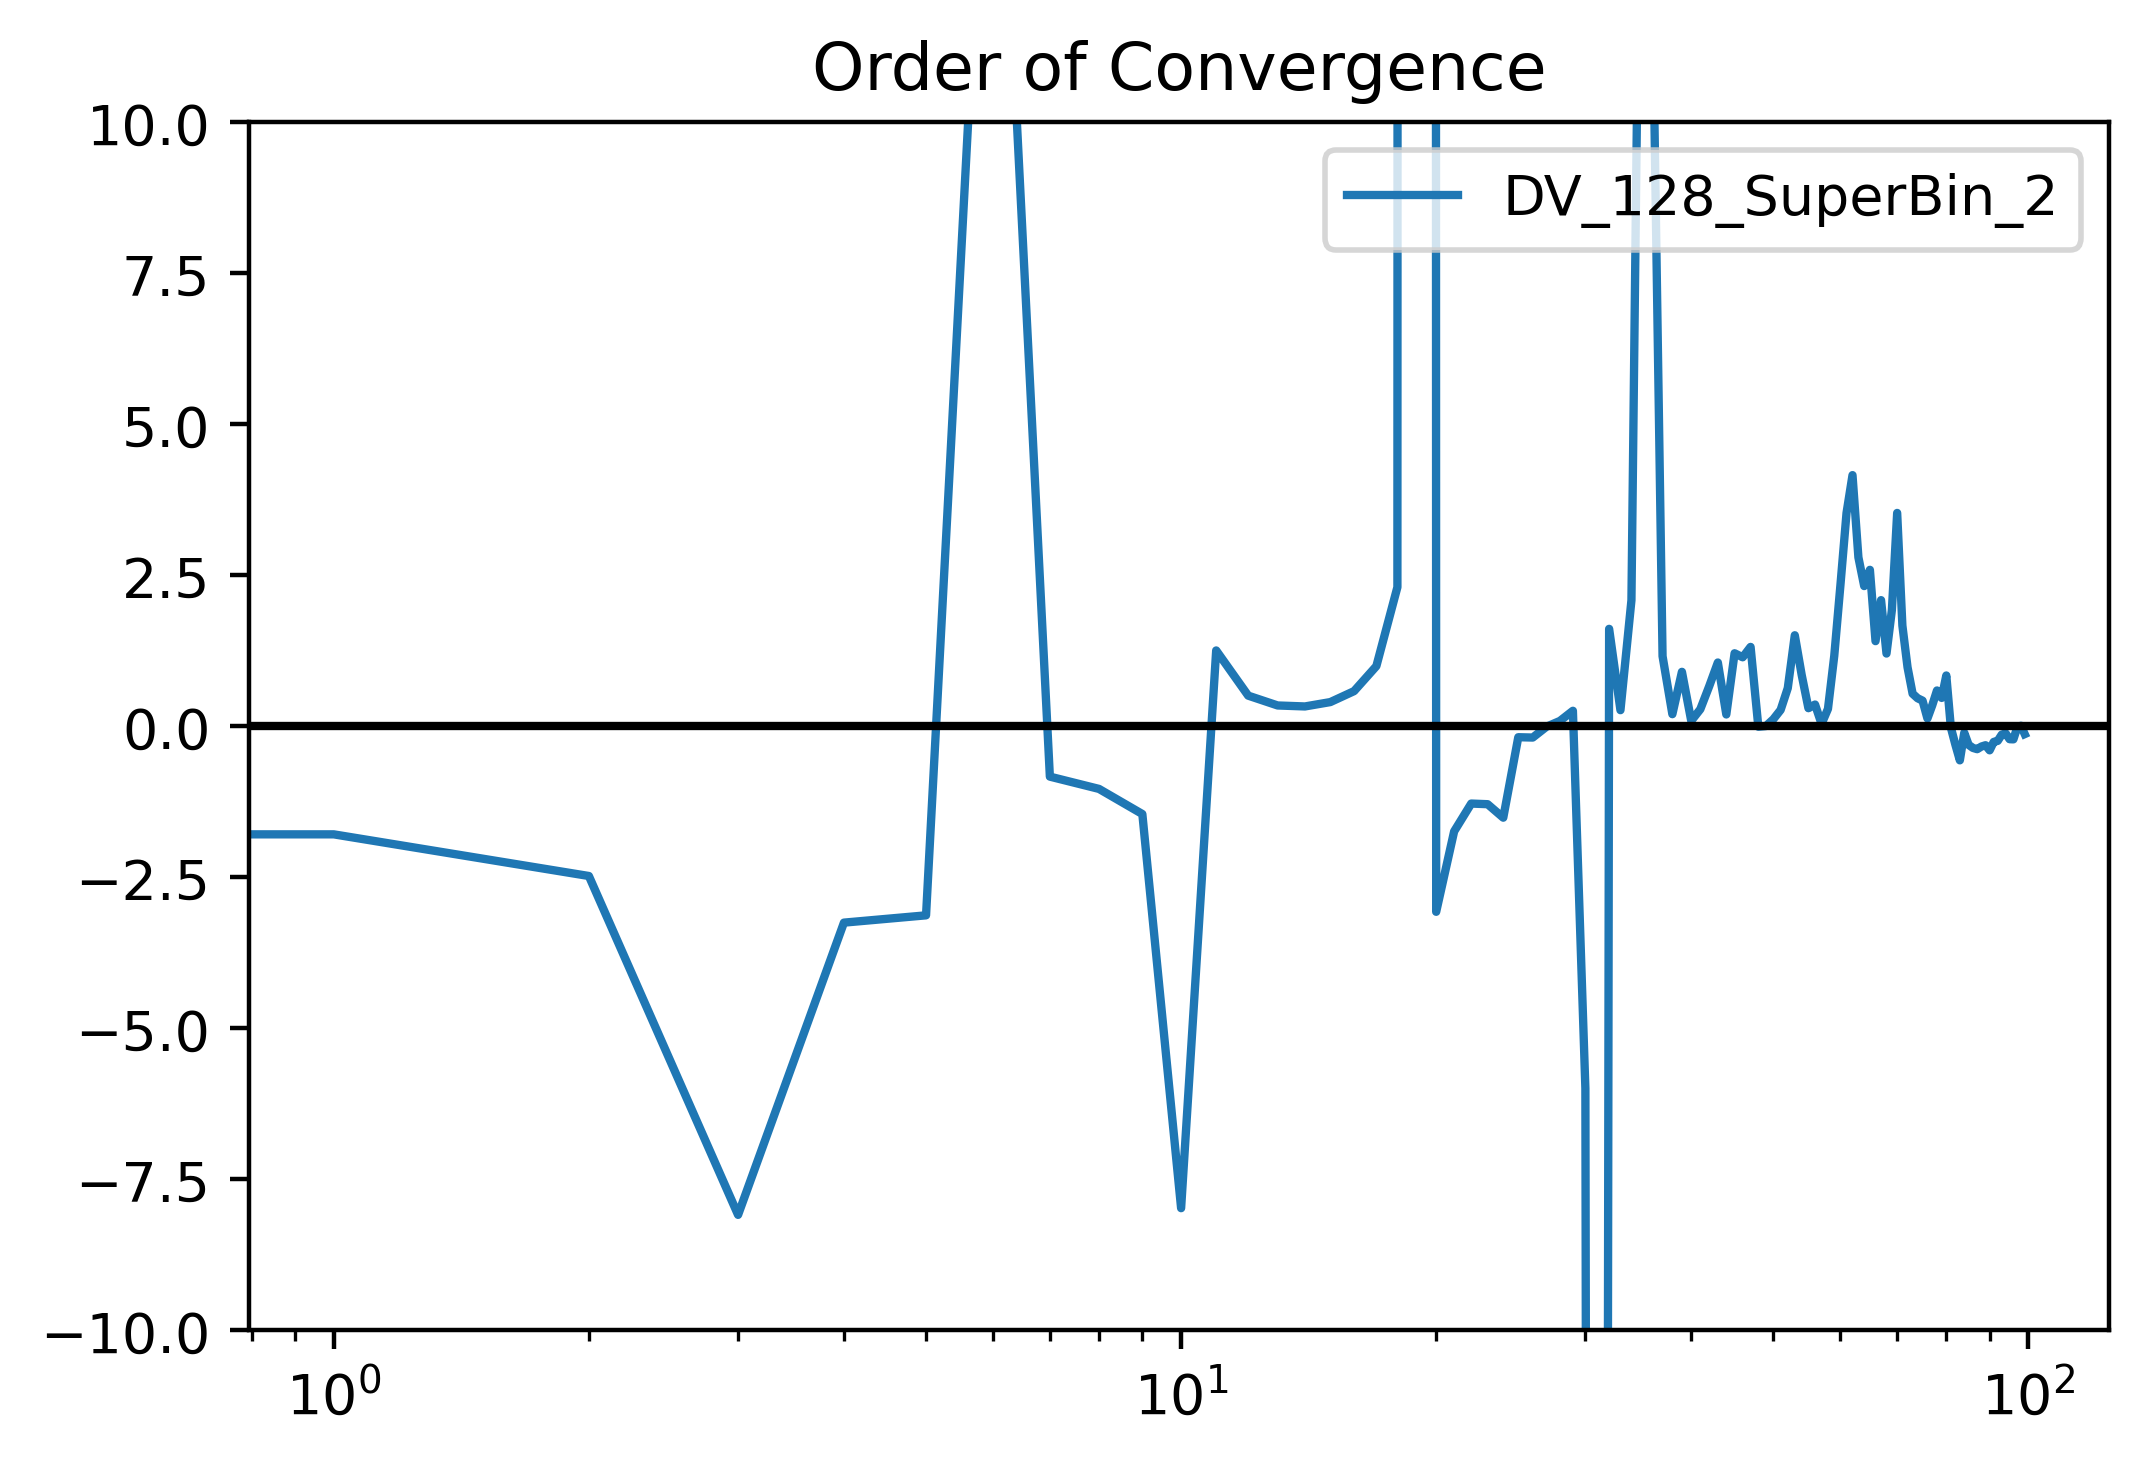

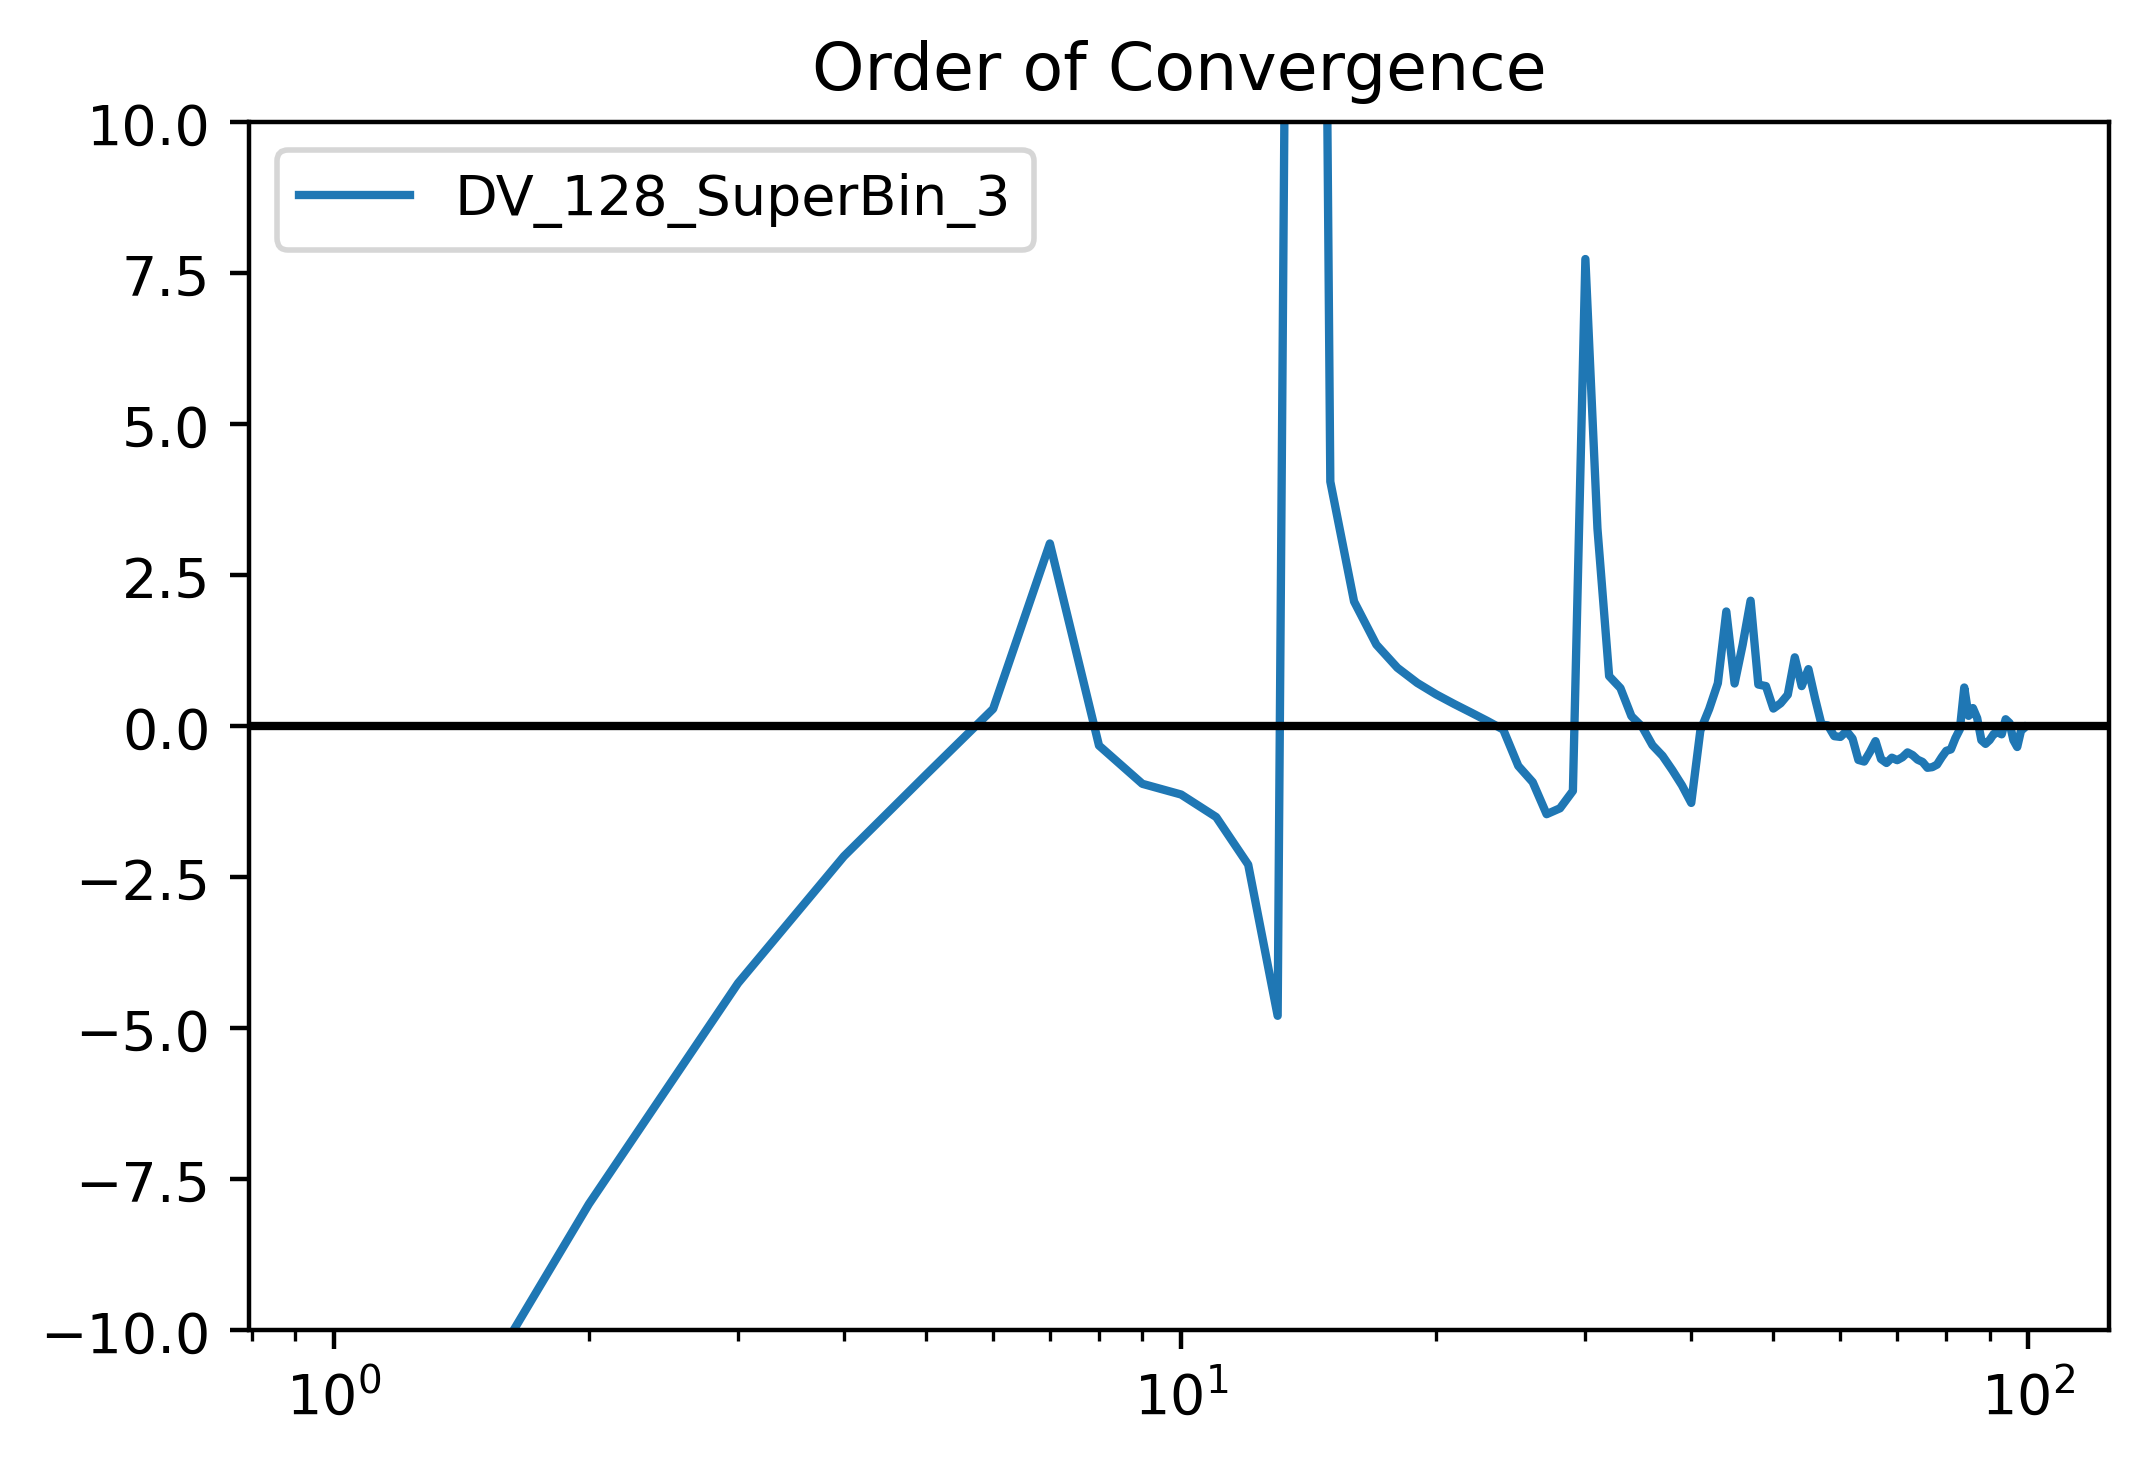

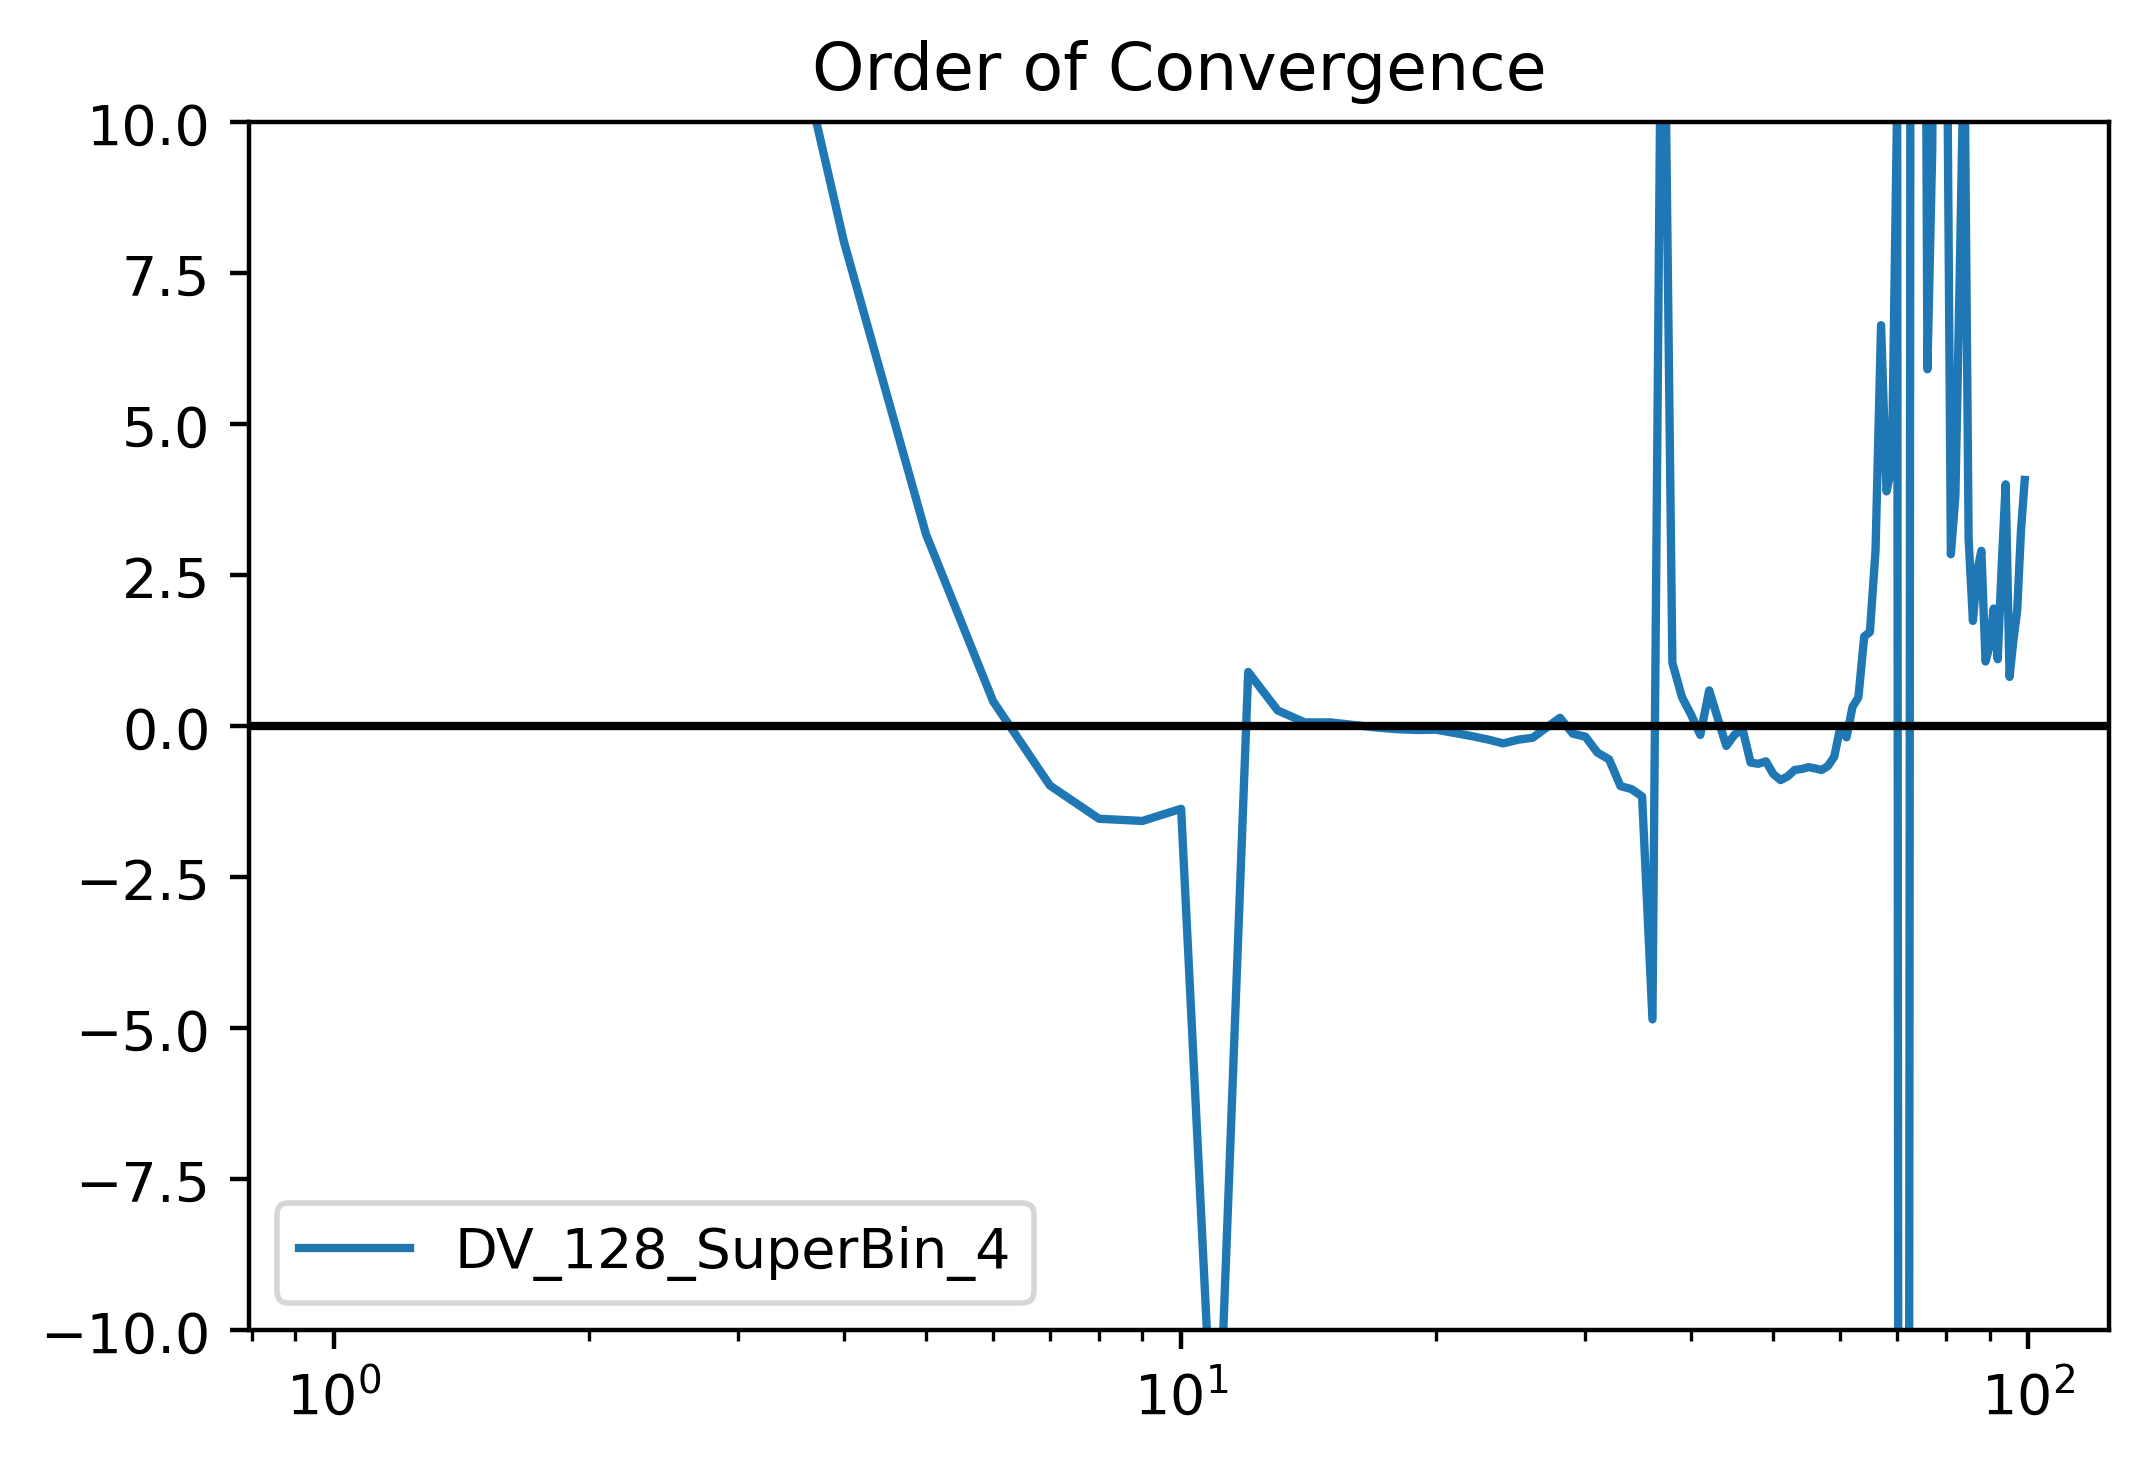

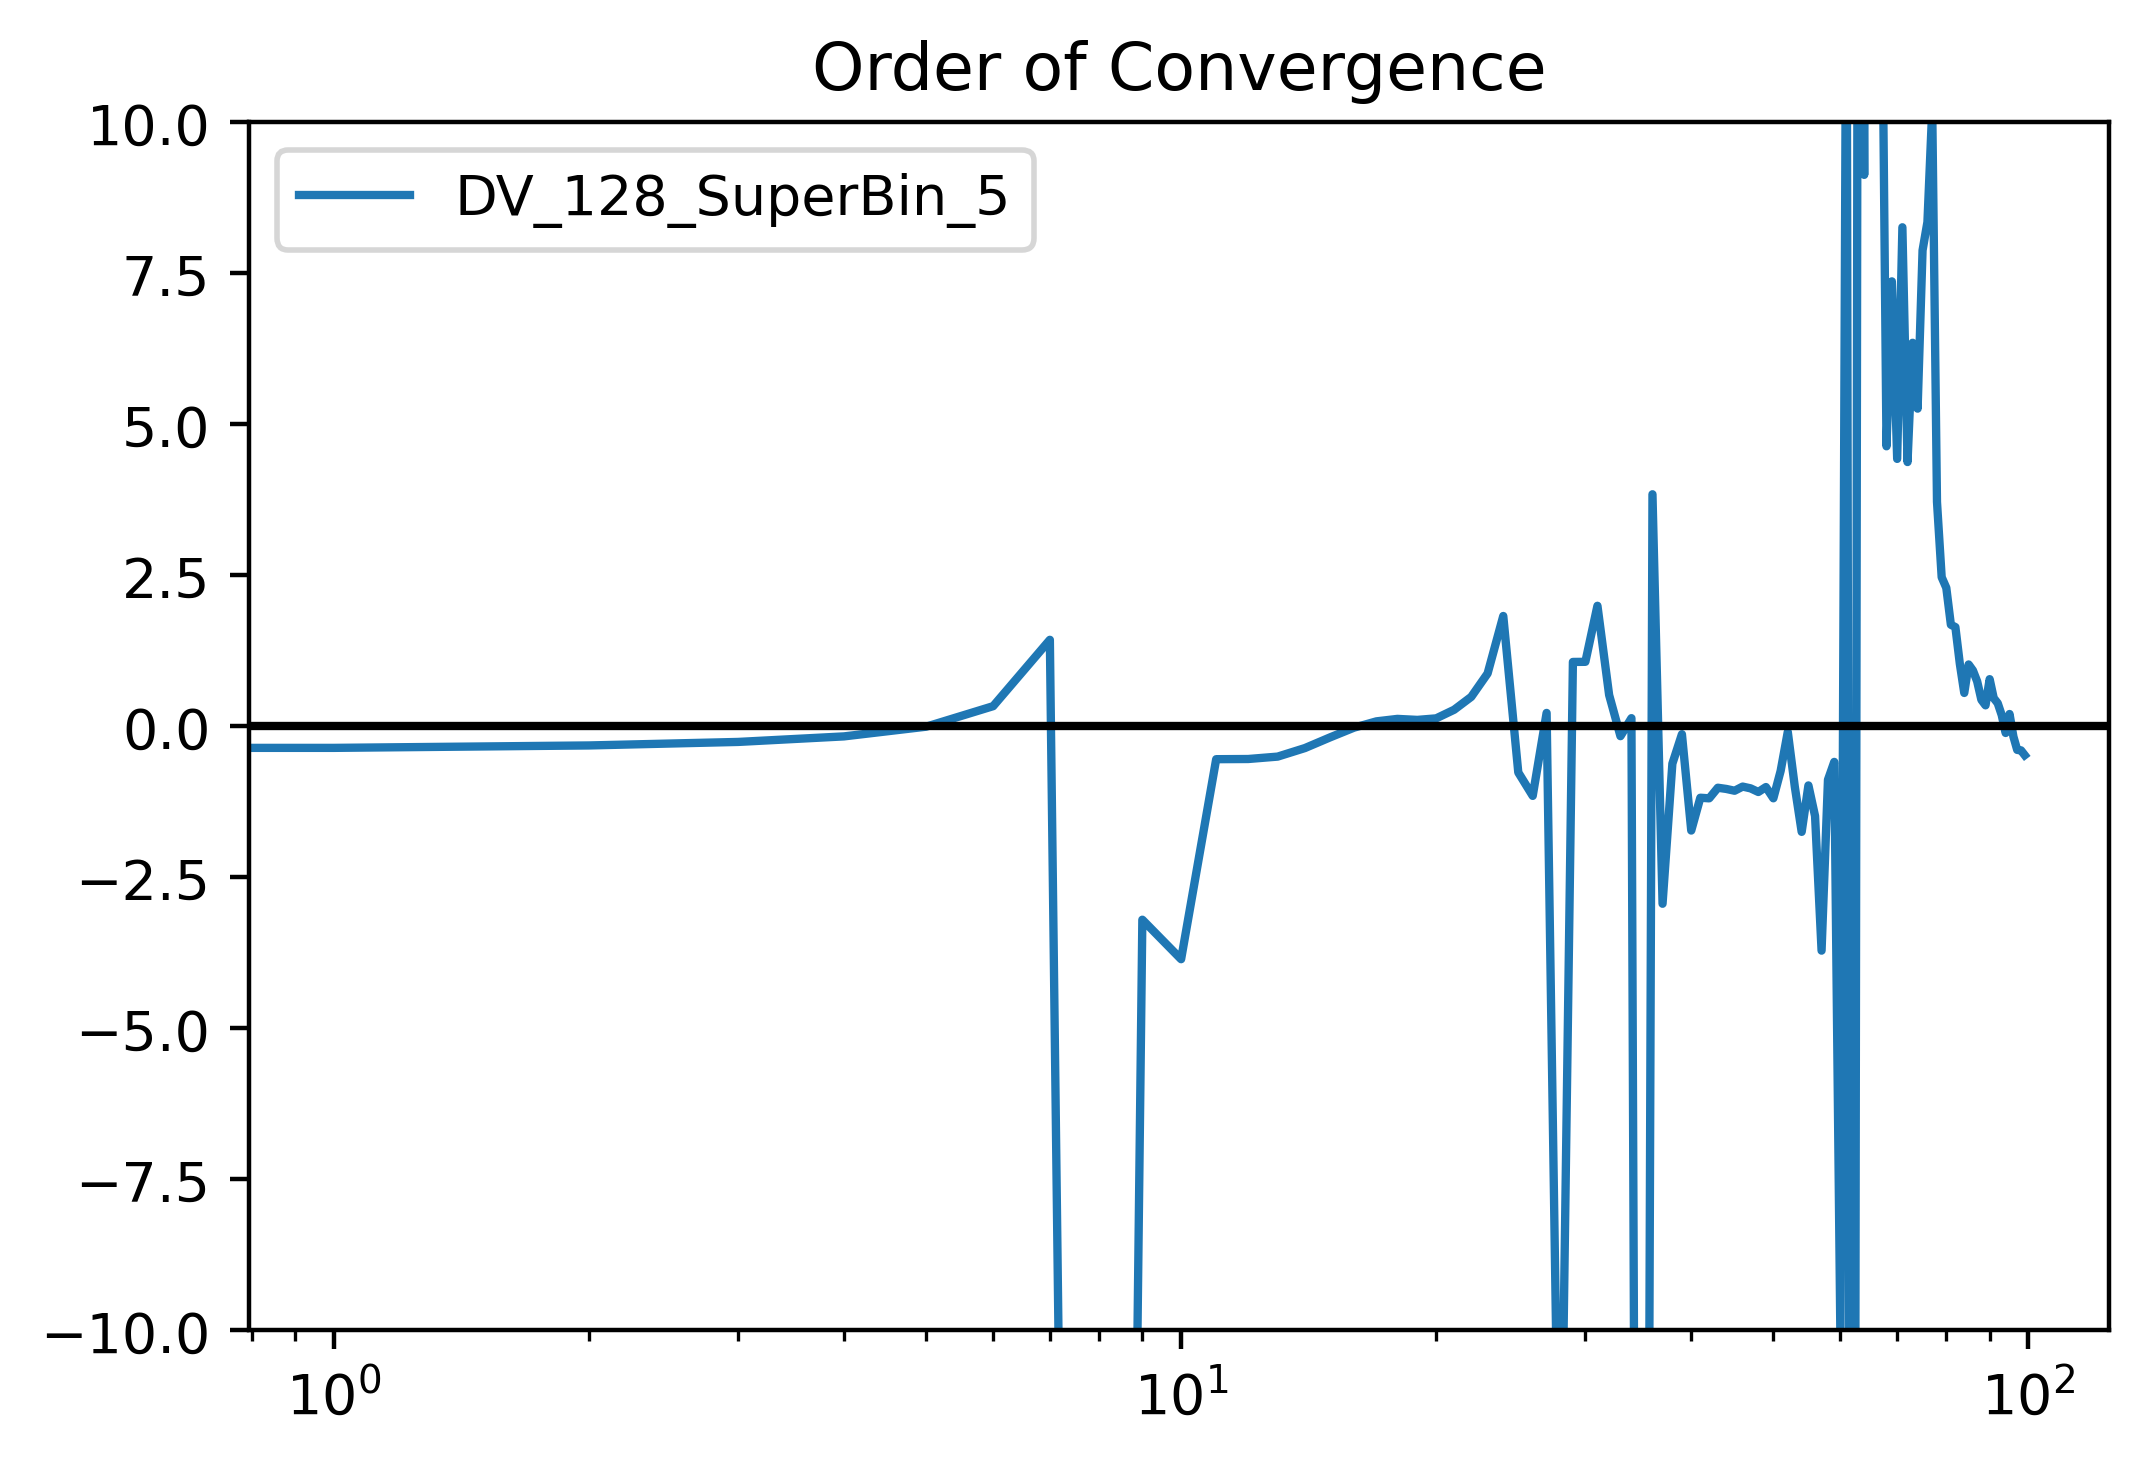

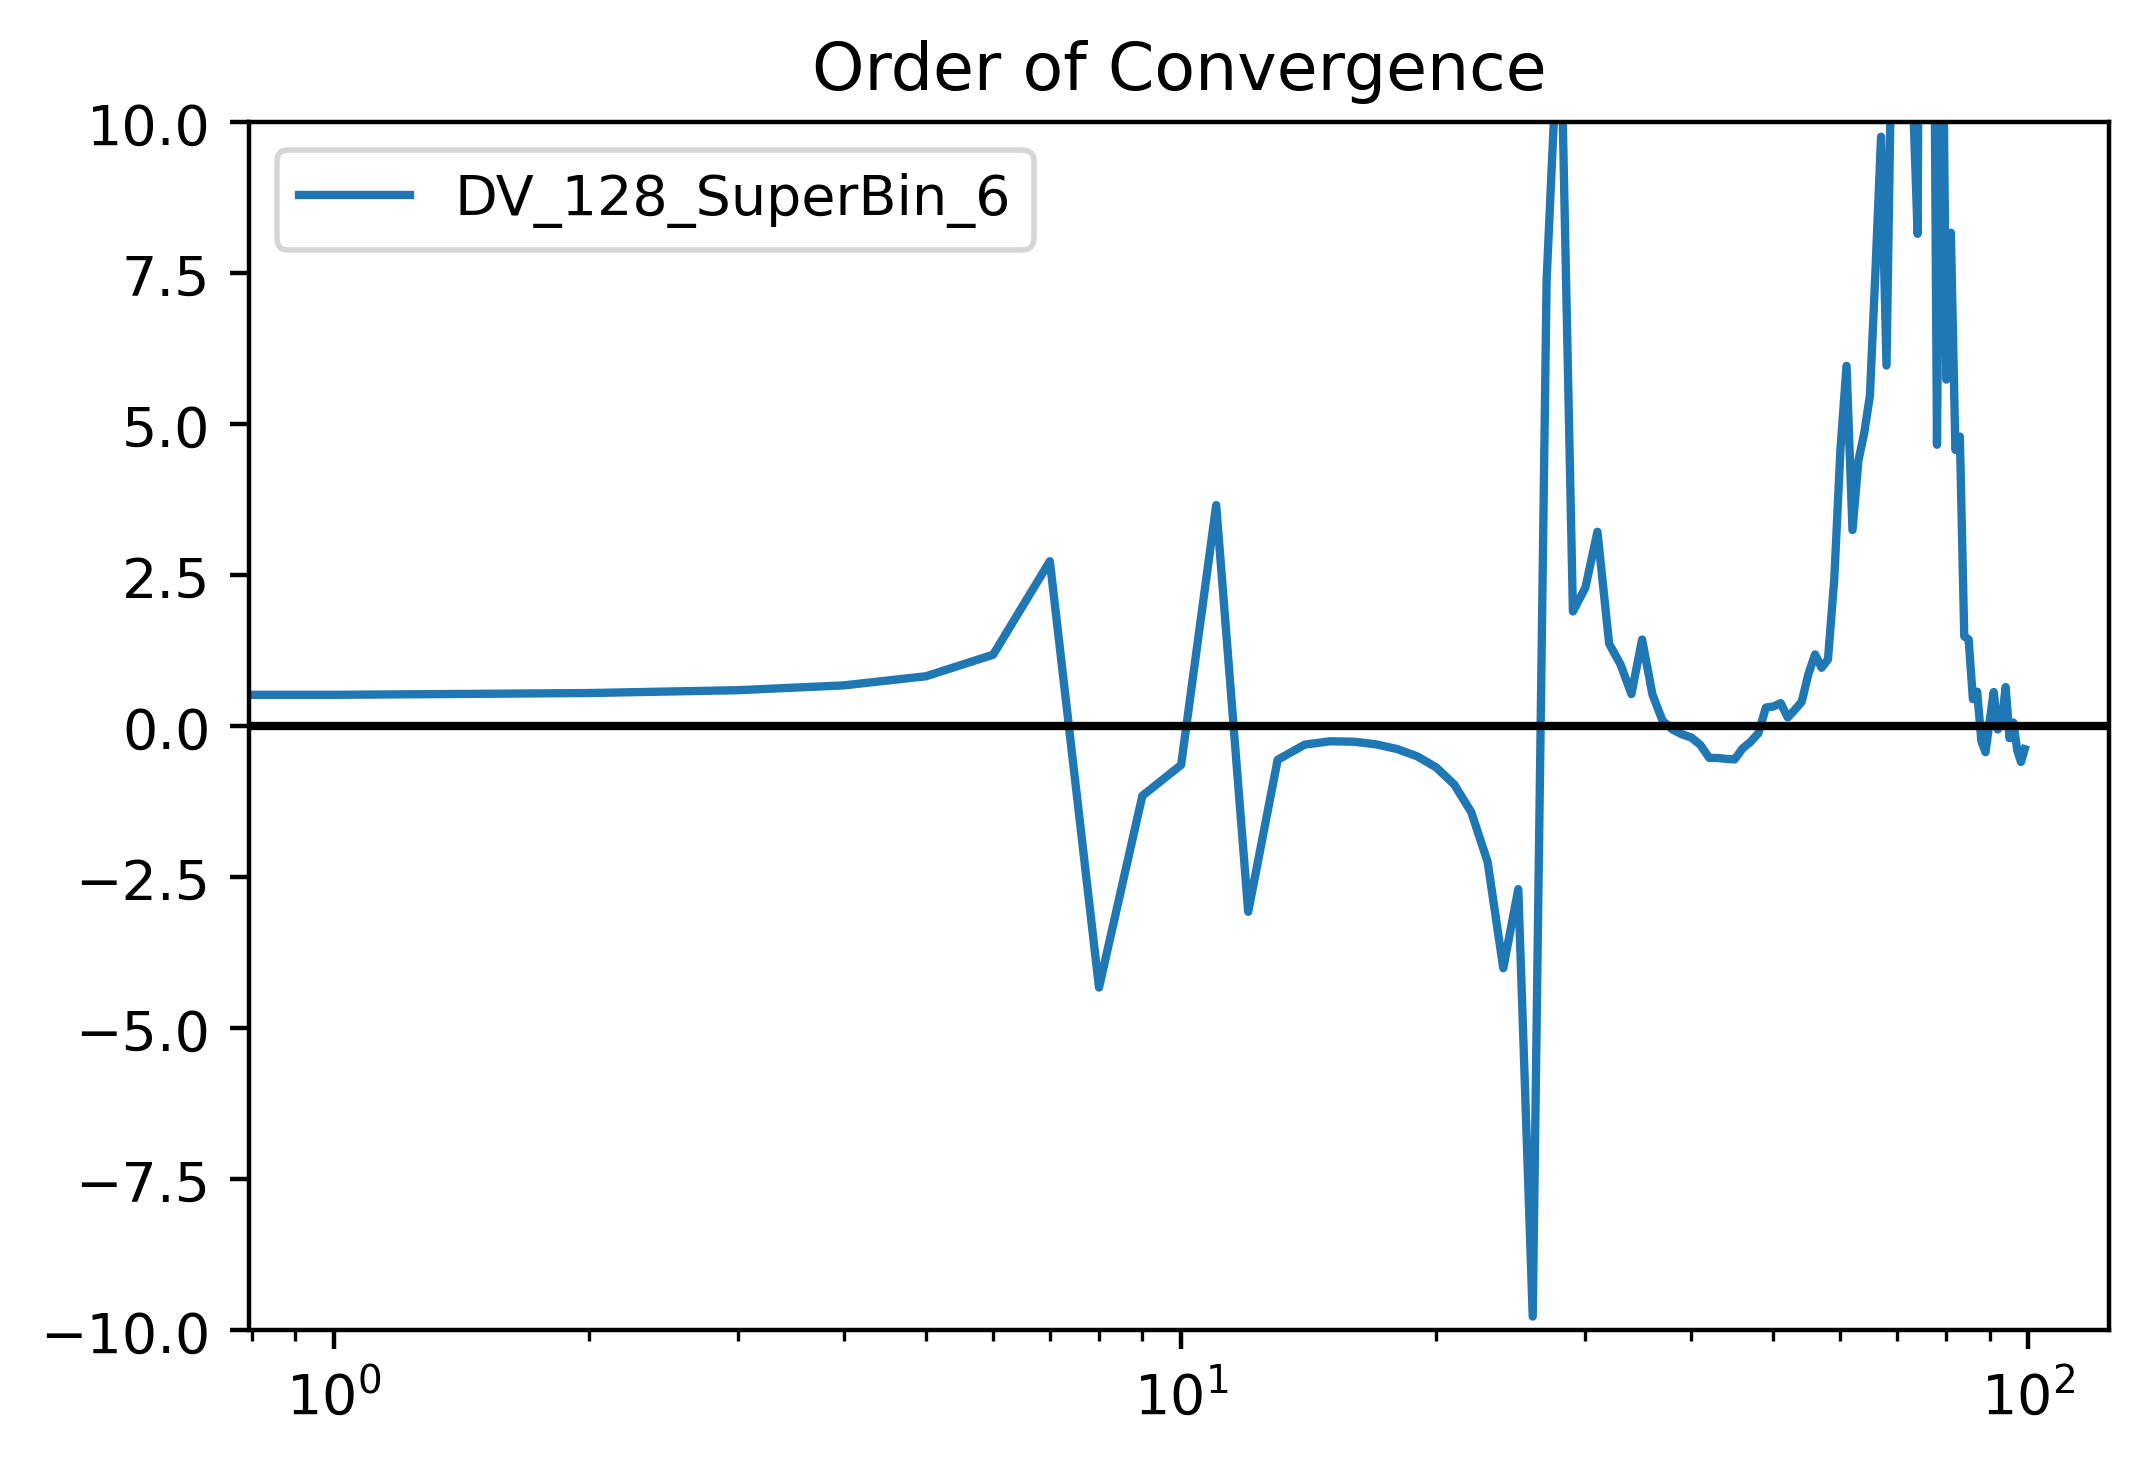

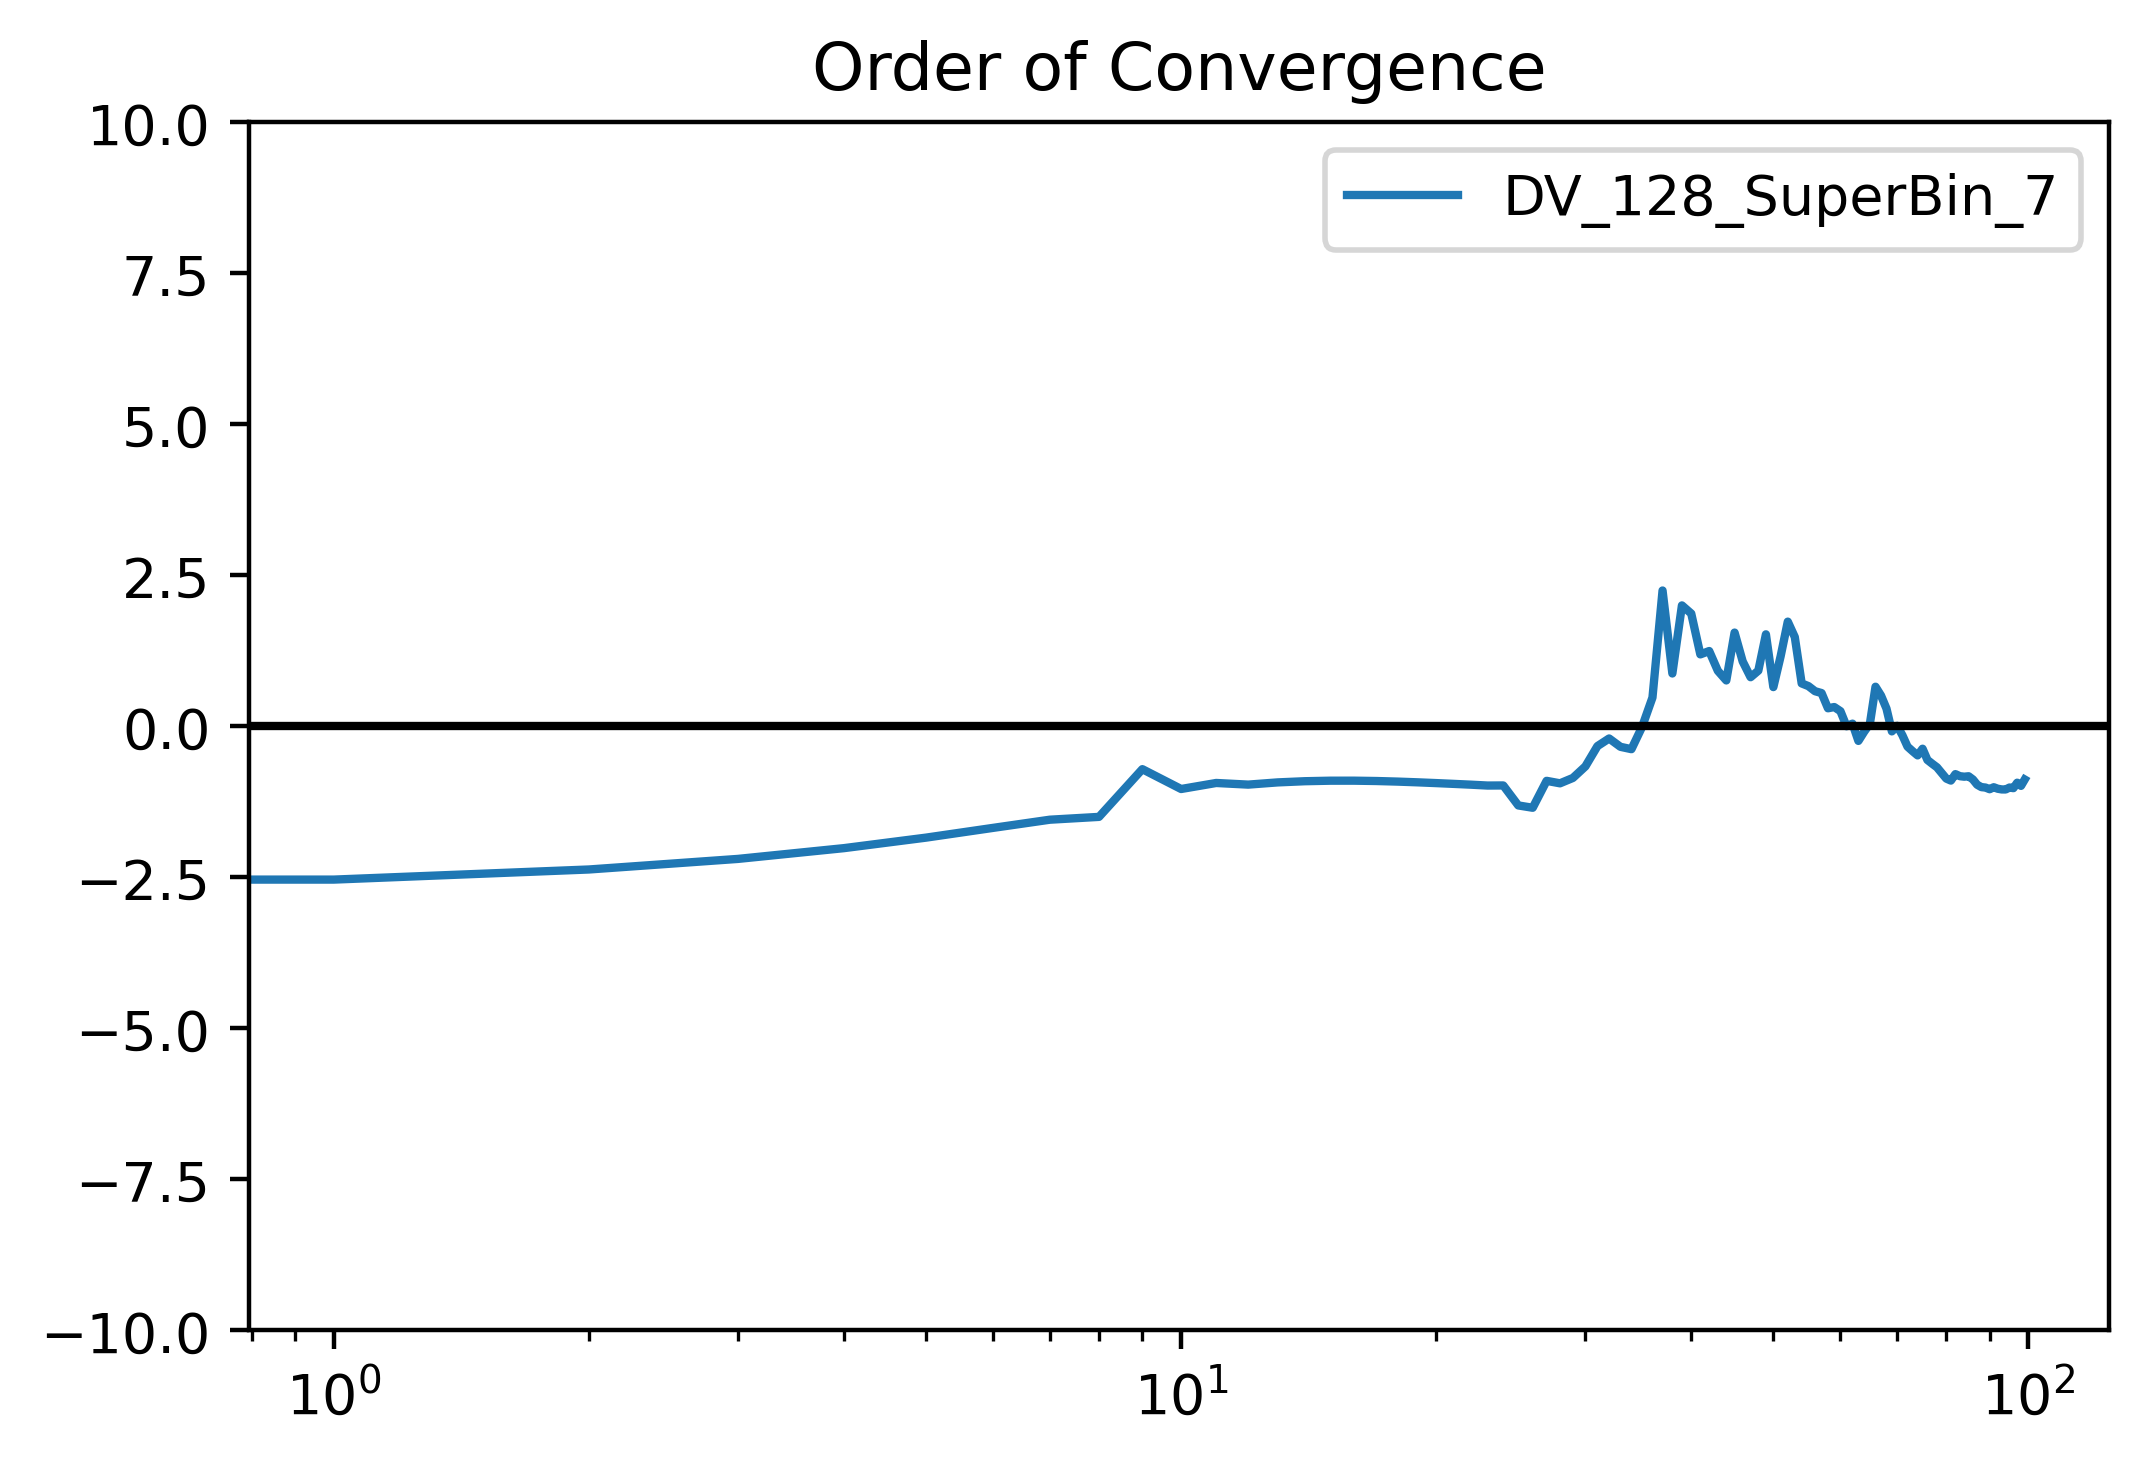

In [52]:
for i in range(9):
    XkMinus2 = smoothRatio[i:36:9,:100][3]
    XkMinus1 = smoothRatio[i:36:9,:100][0]
    Xk = smoothRatio[i:36:9,:100][1]
    XkPlus1 = smoothRatio[i:36:9,:100][2]

    q = np.log(np.abs((XkPlus1-Xk)/(Xk-XkMinus1)))/np.log(np.abs((Xk-XkMinus1)/(XkMinus1-XkMinus2)))
    
    print(np.mean(q))
    
    plt.figure(dpi=400)
    plt.semilogx(q);
    plt.legend(titles[i:36:9]);
    plt.ylim([-10,10])
    plt.axhline(y=0,color='k')
    plt.title('Order of Convergence')